<a href="https://colab.research.google.com/github/beamscource/colab_notebooks/blob/main/pytorch_speech_hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Frameworks

- https://blog.banafo.com/open-source-speech-to-text-frameworks/

## Kaldi

- https://github.com/kaldi-asr/kaldi
- https://www.eleanorchodroff.com/tutorial/kaldi/training-overview.html
- https://kaldi-asr.org/doc/kaldi_for_dummies.html?source=post_page---------------------------
- https://jrmeyer.github.io/asr/2016/01/26/Installing-Kaldi.html
- https://kaldi-asr.org/models.html

## PyTorch-Kaldi

- https://github.com/mravanelli/pytorch-kaldi
- https://arxiv.org/abs/1811.07453

**Introduction**

Kaldi (https://github.com/kaldi-asr/kaldi) is nowadays an established framework used to develop
state-of-the-art speech recognizers.

It relies on finite-state transducers (FSTs) and provides a set of C++ libraries for efficiently implementing state-of-the-art speech recognition systems. Moreover, the toolkit includes a large set of recipes that
cover all the most popular speech corpora.

PyTorch is a Python package that implements efficient GPU-based tensor computations and facilitates the design of
neural architectures, thanks to proper routines for automatic gradient computation.

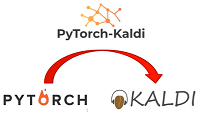

The PyTorch-Kaldi project aims to bridge the gap between these
popular toolkits, trying to o inherit the efficiency of Kaldi and the
flexibility of PyTorch.

The toolkit implements acoustic models in PyTorch,
while feature extraction, label/alignment computation, and decoding are performed with Kaldi, making it suitable to develop stateof-the-art DNN-HMM speech recognizers.

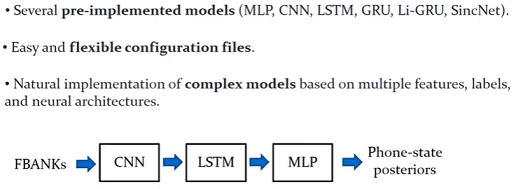

Combinations between deep learning models, acoustic features, and labels are also supported, enabling the use of complex neural architectures. For instance, users can employ a cascade between CNNs, LSTMs, and DNNs, or run in parallel several models that share some hidden layers.

Users can also explore different acoustic features, context duration, neuron activations (e.g., ReLU, leaky ReLU), normalizations (e.g., batch and layer normalization), cost functions, regularization strategies (e.g, L2, dropout), optimization algorithms (e.g., Adam, RMSPROP), and many other hyper-parameters of an ASR system through simple edits of configuration files.

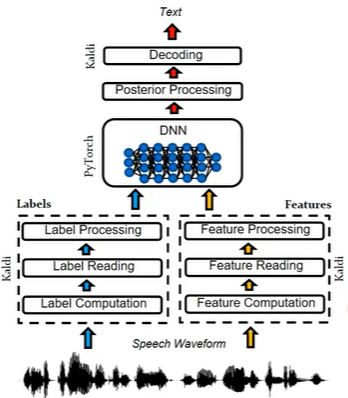

The main script `run_exp.py` is written in python
and manages all the phases involved in an ASR system, including
feature and label extraction, training, validation, decoding, and scoring. 

The toolkit can perform computations on both local machines and HPC cluster, and supports multi-gpu training, recovery
strategy, and automatic data chunking.

**Configuration file**

The main script takes as input a configuration file in INI format. See a description here https://github.com/mravanelli/pytorch-kaldi#description-of-the-configuration-files

In [ ]:
[exp]
cmd = 
run_nn_script = run_nn
out_folder = exp/TIMIT_MLP_basic5
seed = 1234
use_cuda = True
multi_gpu = False
save_gpumem = False
n_epochs_tr = 24

[dataset1]
data_name = TIMIT_tr
fea = fea_name=mfcc
    fea_lst=quick_test/data/train/feats_mfcc.scp
    fea_opts=apply-cmvn --utt2spk=ark:quick_test/data/train/utt2spk  ark:quick_test/mfcc/train_cmvn_speaker.ark ark:- ark:- | add-deltas --delta-order=2 ark:- ark:- |
    cw_left=5
    cw_right=5
    
lab = lab_name=lab_cd
    lab_folder=quick_test/dnn4_pretrain-dbn_dnn_ali
    lab_opts=ali-to-pdf
    lab_count_file=auto
    lab_data_folder=quick_test/data/train/
    lab_graph=quick_test/graph
    
n_chunks = 5

[dataset2]
data_name = TIMIT_dev
fea = fea_name=mfcc
    fea_lst=quick_test/data/dev/feats_mfcc.scp
    fea_opts=apply-cmvn --utt2spk=ark:quick_test/data/dev/utt2spk  ark:quick_test/mfcc/dev_cmvn_speaker.ark ark:- ark:- | add-deltas --delta-order=2 ark:- ark:- |
    cw_left=5
    cw_right=5
    
lab = lab_name=lab_cd
    lab_folder=quick_test/dnn4_pretrain-dbn_dnn_ali_dev
    lab_opts=ali-to-pdf
    lab_count_file=auto
    lab_data_folder=quick_test/data/dev/
    lab_graph=quick_test/graph
n_chunks = 1

[dataset3]
data_name = TIMIT_test
fea = fea_name=mfcc
    fea_lst=quick_test/data/test/feats_mfcc.scp
    fea_opts=apply-cmvn --utt2spk=ark:quick_test/data/test/utt2spk  ark:quick_test/mfcc/test_cmvn_speaker.ark ark:- ark:- | add-deltas --delta-order=2 ark:- ark:- |
    cw_left=5
    cw_right=5
    
lab = lab_name=lab_cd
    lab_folder=quick_test/dnn4_pretrain-dbn_dnn_ali_test
    lab_opts=ali-to-pdf
    lab_count_file=auto
    lab_data_folder=quick_test/data/test/
    lab_graph=quick_test/graph
    
n_chunks = 1

[data_use]
train_with = TIMIT_tr
valid_with = TIMIT_dev
forward_with = TIMIT_test

[batches]
batch_size_train = 128
max_seq_length_train = 1000
increase_seq_length_train = False
start_seq_len_train = 100
multply_factor_seq_len_train = 2
batch_size_valid = 128
max_seq_length_valid = 1000

[architecture1]
arch_name = MLP_layers1
arch_proto = proto/MLP.proto
arch_library = neural_networks
arch_class = MLP
arch_pretrain_file = none
arch_freeze = False
arch_seq_model = False
dnn_lay = 1024,1024,1024,1024,N_out_lab_cd
dnn_drop = 0.15,0.15,0.15,0.15,0.0
dnn_use_laynorm_inp = False
dnn_use_batchnorm_inp = False
dnn_use_batchnorm = True,True,True,True,False
dnn_use_laynorm = False,False,False,False,False
dnn_act = relu,relu,relu,relu,softmax
arch_lr = 0.08
arch_halving_factor = 0.5
arch_improvement_threshold = 0.001
arch_opt = sgd
opt_momentum = 0.0
opt_weight_decay = 0.0
opt_dampening = 0.0
opt_nesterov = False

[proto]
library=path
class=MLP
dnn_lay=str_list
dnn_drop=float_list(0.0,1.0)
dnn_use_laynorm_inp=bool
dnn_use_batchnorm_inp=bool
dnn_use_batchnorm=bool_list
dnn_use_laynorm=bool_list
dnn_act=str_list

[model]
model_proto = proto/model.proto
model = out_dnn1=compute(MLP_layers1,mfcc)
    loss_final=cost_nll(out_dnn1,lab_cd)
    err_final=cost_err(out_dnn1,lab_cd)

[model]
model_proto=proto/model.proto
model:conc1=concatenate(mfcc,fbank)
      conc2=concatenate(conc1,fmllr)
      out_dnn1=compute(MLP_layers_first,conc2)
      out_dnn2=compute(liGRU_layers,out_dnn1)
      out_dnn3=compute(MLP_layers_second,out_dnn2)
      out_dnn4=compute(MLP_layers_last,out_dnn3)
      out_dnn5=compute(MLP_layers_last2,out_dnn3)
      loss_mono=cost_nll(out_dnn5,lab_mono)
      loss_mono_w=mult_constant(loss_mono,1.0)
      loss_cd=cost_nll(out_dnn4,lab_cd)
      loss_final=sum(loss_cd,loss_mono_w)     
      err_final=cost_err(out_dnn4,lab_cd)

[forward]
forward_out = out_dnn1
normalize_posteriors = True
normalize_with_counts_from = lab_cd
save_out_file = True
require_decoding = True

[decoding]
decoding_script_folder = kaldi_decoding_scripts/
decoding_script = decode_dnn.sh
decoding_proto = proto/decoding.proto
min_active = 200
max_active = 7000
max_mem = 50000000
beam = 13.0
latbeam = 8.0
acwt = 0.2
max_arcs = -1
skip_scoring = false
scoring_script = local/score.sh
scoring_opts = "--min-lmwt 1 --max-lmwt 10"
norm_vars = False



In [ ]:
python run_exp.py quick_test/example_newcode.cfg --optimization,lr=0.01 --batches,batch_size=4

**Features**

The feature extraction is performed with Kaldi, that natively provides c++ libraries (e.g., *compute-mfcc-feats*, *compute-fbank-feats*,
*compute-plp-feats*) to efficiently extract the most popular speech recognition features.

PyTorch-Kaldi can manage multiple feature streams.
For instance, users can define models that exploit combinations of
MFCCs, FBANKs, PLP, and fMLLR coefficients

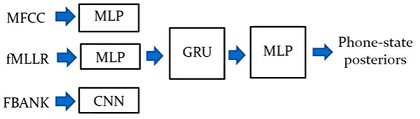

**Labels**

The main labels used for training the acoustic model derive from a
forced alignment procedure between the speech features and the sequence of context-dependent phone states computed by Kaldi with
a phonetic decision tree.

**Chunks and multi-batch composition**

PyTorch-Kaldi automatically splits the full dataset into a number
of chunks, which are composed of labels and features randomly
sampled from the full corpus. Each chunk is then stored into the
GPU or CPU memory and processed by the neural training algorithm
run nn.py. The toolkit dynamically composes different chunks at
each epoch. A set of mini-batches are then derived from them.

The way mini-batches are gathered strongly depends on the typology of the neural network. For feed-forward models, the minibatches are composed of randomly shuffled features and labels sampled from the chunk. For recurrent networks, the minibatches must
be composed of full sentences. Different sentences, however, are
likely to have different duration, making zero-padding necessary to
form mini-batches of the same size. PyTorch-Kaldi sorts the speech
sequences in ascending order according to their lengths (i.e., short
sentences are processed first).

**NN processing**

Each minibatch is processed by a neural network implemented with
PyTorch, that takes as input the features and as outputs a set of posterior probabilities over the context-dependent phone states. The code is designed to easily plug-in customized models. The new model can be simply defined by adding a new `nn-Module` class into the neural `nets.py`.

**Decoding and scoring**

The acoustic posterior probabilities generated by the neural network
are normalized by their prior before feeding the HMM-based decoder of Kaldi. The decoder merges the acoustic scores with the language probabilities derived by an n-gram language model and tries
to retrieve the sequence of words uttered in the speech signal using a
beam-search algorithm. The final Word-Error-Rate (WER) score is
computed with the NIST SCTK scoring toolkit.

## Speechbrain

- https://speechbrain.github.io/
- https://arxiv.org/pdf/2106.04624.pdf - SpeechBrain + survey of other tools

- https://speechbrain.readthedocs.io/en/latest/tutorials.html

- https://huggingface.co/speechbrain/tts-tacotron2-ljspeech

## ESPNet

- https://github.com/espnet/espnet
- https://colab.research.google.com/github/espnet/notebook/blob/master/espnet2_tts_realtime_demo.ipynb#scrollTo=vrRM57hhgtHy

## NeMo (NVIDIA)

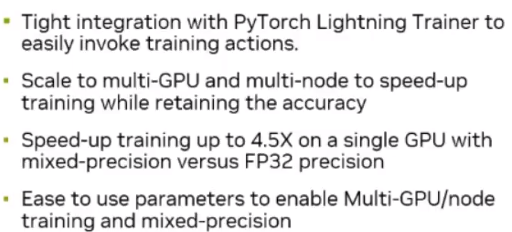

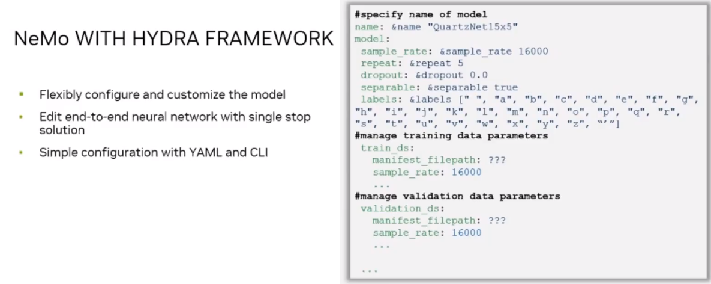

- Weights and Biases is integrated in PyTorch Lightning
- since NeMo is built on top of Lightning, it comes with Weights and Biases out of the box
- https://github.com/tcapelle/nemo_wandb

- https://github.com/NVIDIA/NeMo
- https://docs.nvidia.com/deeplearning/nemo/user-guide/docs/en/main/index.html

- https://github.com/NVIDIA/NeMo/tree/stable/tutorials/
- https://github.com/NVIDIA/NeMo/tree/v1.0.2/tutorials/asr/
- https://github.com/NVIDIA/NeMo/tree/v1.0.2/tutorials

To learn more about what TTS technology and models are available in NeMo, please look through our [documentation](https://docs.nvidia.com/deeplearning/nemo/user-guide/docs/en/main/tts/intro.html#).

To get more hands on experience with NeMo TTS, look through some of our other [tutorials](https://github.com/NVIDIA/NeMo/tree/main/tutorials/tts).

*   Running pretrained models: [Inference_ModelSelect](https://github.com/NVIDIA/NeMo/blob/main/tutorials/tts/Inference_ModelSelect.ipynb)
*   FastPitch [training](https://github.com/NVIDIA/NeMo/blob/main/tutorials/tts/FastPitch_MixerTTS_Training.ipynb) and [fine-tuning](https://github.com/NVIDIA/NeMo/blob/main/tutorials/tts/FastPitch_Finetuning.ipynb)

To learn how to deploy and serve your TTS models, visit [Riva](https://docs.nvidia.com/deeplearning/riva/index.html).

**General installation**

In [ ]:
# Install NeMo library. If you are running locally (rather than on Google Colab), comment out the below lines
# and instead follow the instructions at https://github.com/NVIDIA/NeMo#Installation
BRANCH = 'r1.14.0'
!python -m pip install git+https://github.com/NVIDIA/NeMo.git@$BRANCH#egg=nemo_toolkit[all]
!python -m pip install git+https://github.com/NVIDIA/NeMo.git

!pip uninstall matplotlib
!pip install matplotlib==3.1.2

In [ ]:
# Download local version of NeMo scripts. If you are running locally and want to use your own local NeMo code,
# comment out the below lines and set NEMO_DIR to your local path.
NEMO_DIR = 'nemo'
!git clone https://github.com/NVIDIA/NeMo.git $NEMO_DIR

In [ ]:
# https://www.oreilly.com/content/how-to-get-superior-text-processing-in-python-with-pynini/
# Install pynini for text processing
!bash $NEMO_DIR/nemo_text_processing/install_pynini.sh

**Text  normalization**

More details on NeMo text normalization can be found in the [TN documentation](https://docs.nvidia.com/deeplearning/nemo/user-guide/docs/en/main/nlp/text_normalization/intro.html).

A more comprehensive list of text normalization rules, examples, and languages are available in the [code](https://github.com/NVIDIA/NeMo/tree/main/nemo_text_processing/text_normalization).

In [ ]:
from nemo_text_processing.text_normalization.normalize import Normalizer

text_normalizer = Normalizer(input_case="cased", lang="en")

In [ ]:
text = "Mr. Johnson is turning 35 years old on 04-15-2023."
normalized_text = text_normalizer.normalize(text)

print(text)
print(normalized_text)

**Grapheme to phoneme conversion**

Details on how NeMo G2P works can be found in the [G2P documentation](https://docs.nvidia.com/deeplearning/nemo/user-guide/docs/en/stable/text_processing/g2p/g2p.html).

We will show how to do both IPA and ARPABET G2P using NeMo:

In [ ]:
import os
from nemo.collections.tts.torch.g2ps import EnglishG2p, IPAG2P

ipa_dict_path = os.path.join(NEMO_DIR, "scripts", "tts_dataset_files", "ipa_cmudict-0.7b_nv22.10.txt")

# EnglishG2p uses the CMU dictionary by default, if none is provided
arpabet_g2p = EnglishG2p()
ipa_g2p = IPAG2P(phoneme_dict=ipa_dict_path)

In [ ]:
text = "Hello world"
arpabet_phonemes = arpabet_g2p(text)
ipa_phonemes = ipa_g2p(text)

print(text)
print(arpabet_phonemes)
print(ipa_phonemes)

Notice that graphemes are returned for the word "hello" rather than the ARPABET phonemes.

This is because the English G2P module uses its dictionary to map graphemes to phonemes. The word "hello" has two possible pronunciations.

In [ ]:
print(arpabet_g2p.phoneme_dict['hello'])

Since the pronunciation is *ambiguous*, it returns the graphemes instead. By default it will also do this for any word **out of vocabulary (oov)** words that are not in the CMU dictionary.

In general, handling ambiguous pronunciations is a difficult problem which we will discuss more below.

For now, we can tell the G2P module to simply return the first pronunciation in the dictionary by setting `ignore_ambiguous_words=False`.

In [ ]:
arpabet_g2p = EnglishG2p(ignore_ambiguous_words=False)
ipa_g2p = IPAG2P(phoneme_dict=ipa_dict_path, ignore_ambiguous_words=False)

In [ ]:
text = "Hello world"
arpabet_phonemes = arpabet_g2p(text)
ipa_phonemes = ipa_g2p(text)

print(text)
print(arpabet_phonemes)
print(ipa_phonemes)

At the end of G2P we have a list of characters. In order for our model to process these characters, we need to convert them into numbers.

To do this we have a vocabulary containing all characters in our alphabet. Each character gets assigned a fixed number, such that every time it shows up in the text it is replaced with that number.

In [ ]:
from nemo.collections.tts.torch.tts_tokenizers import EnglishPhonemesTokenizer, IPATokenizer

arpabet_tokenizer = EnglishPhonemesTokenizer(arpabet_g2p)
ipa_tokenizer = IPATokenizer(ipa_g2p)

In [ ]:
text = "Hello world"
arpabet_tokens = arpabet_tokenizer(text)
ipa_tokens = ipa_tokenizer(text)

print(text)
print(arpabet_tokens)
print(ipa_tokens)

NeMo supports **mixed grapheme-phoneme training** in which the model is trained on inputs which contain both graphemes and phonemes. Doing this may teach the model to pronounce optimally with phonemes while also providing reasonable out-of-the-box behavior on OOV words and heteronyms.

To do mixed training, the `EnglishG2p()` class has a `phoneme_probability` parameter which allows you to specify how likely each word will be left as graphemes at training time.

**Full example**

In [ ]:
import torch
import IPython.display as ipd
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from nemo.collections.tts.models.base import SpectrogramGenerator, Vocoder

# List pretrained models available in NeMo
print("Spectrogram Models")
print(SpectrogramGenerator.list_available_models())

In [ ]:
print()
print("Vocoders")
print(Vocoder.list_available_models())

In [ ]:
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

# Load our spectrogram and vocoder models onto our CPU
spectrogram_model = SpectrogramGenerator.from_pretrained("tts_en_tacotron2").eval().to(device)
#spectrogram_model = SpectrogramGenerator.from_pretrained("tts_en_fastpitch").eval().to(device)
vocoder = Vocoder.from_pretrained("tts_hifigan").eval().to(device)

In [ ]:
text = "This audio was generated with a text-to-speech model."

# Normalize the text and convert it into individual phonemes/tokens.
tokens = spectrogram_model.parse(text, normalize=True)

# Generate spectrogram from text
spectrogram = spectrogram_model.generate_spectrogram(tokens=tokens)

# Invert the spectrogram into audio samples
audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)

# Convert output from pytorch tensor to numpy array
spectrogram = spectrogram.cpu().detach().numpy()[0]
audio = audio.cpu().detach().numpy()[0]

In [ ]:
print(f'"{text}"\n')

ipd.Audio(audio, rate=22050)

In [ ]:
# Visualize the spectrogram
imshow(spectrogram, origin="lower")
plt.xlabel("Audio Frame")
plt.ylabel("Frequency Band")
plt.show()

Another example:

In [ ]:
audio_path = "LJ023-0089.wav"

# Process the ground truth audio
sample_rate = 22050
audio, _ = librosa.load(audio_path, sr=sample_rate)

audio_tensor = torch.from_numpy(audio).unsqueeze(0).to(tacotron2_model.device)
audio_len = torch.tensor(audio_tensor.shape[1], dtype=torch.long, device=tacotron2_model.device).unsqueeze(0)

# Extract the spectrogram using the FastPitch audio preprocessor
spectrogram, spectrogram_len = fastpitch_model.preprocessor(input_signal=audio_tensor, length=audio_len)

# Invert the spectrogram
reconstructed_audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)
reconstructed_audio = reconstructed_audio.cpu().detach().numpy()[0]

In [ ]:
print("Original Audio")
ipd.display(ipd.Audio(audio, rate=sample_rate))

print("Reconstructed Audio")
ipd.display(ipd.Audio(reconstructed_audio, rate=sample_rate))

**Additional packages for ASR and speaker verification**

In [ ]:
# Install dependencies
!pip install wget
# https://en.wikipedia.org/wiki/SoX
# https://github.com/libsndfile/libsndfile
# https://itsfoss.com/ffmpeg/
!apt-get install sox libsndfile1 ffmpeg
# https://metacpan.org/pod/Text::Unidecode
!pip install text-unidecode

# Install TorchAudio
!pip install torchaudio>=0.10.0 -f https://download.pytorch.org/whl/torch_stable.html

# Coqui

- https://stt.readthedocs.io/en/latest/playbook/README.html
- https://tts.readthedocs.io/en/latest/
- https://coqui.ai/blog/tts/yourtts-zero-shot-text-synthesis-low-resource-languages
- https://m.youtube.com/watch?v=4YT8WZT_x48

## Fairseq (Meta AI)

- https://github.com/facebookresearch/fairseq

https://github.com/rhoposit?tab=repositories

# Tasks

## ASR

**Introduction**

- https://medium.com/@ageitgey/machine-learning-is-fun-part-6-how-to-do-speech-recognition-with-deep-learning-28293c162f7a
- http://asr.cs.cmu.edu/spring2013/, https://groups.google.com/g/11756-18799D - pre-neural, HHM + n-gram LMs
- https://www.inf.ed.ac.uk/teaching/courses/asr/index-2019.html - classical + neural

**End-to-end ASR**

Neural nets advanced to the point where each component of the traditional speech recognition model could be replaced by a neural model that had better performance and that had a greater potential for generalization.

For example, we could replace an n-gram model with a neural language model, and replace a pronunciation table with a neural pronunciation model, and so on. However, each of these neural models need to be trained individually on different tasks, and errors in any model in the pipeline could throw off the whole prediction.

Thus, we can see the appeal of end-to-end ASR architectures: discriminative models that simply take an audio input and give a textual output, and in which all components of the architecture are trained together towards the same goal. 

The model's encoder would be akin to an acoustic model for extracting speech features, which can then be directly piped to a decoder which outputs text. If desired, we could integrate a language model that would improve our predictions, as well.

With an end-to-end model, we want to directly learn `Pr(transcript|audio)` in order to predict the transcripts from the original audio. Since we are dealing with sequential information--audio data over time that corresponds to a sequence of letters--RNNs are the obvious choice. But now we have a pressing problem to deal with: since our input sequence (number of audio timesteps) is not the same length as our desired output (transcript length), how do we match each time step from the audio data to the correct output characters?

Earlier speech recognition approaches relied on **temporally-aligned data**, in which each segment of time in an audio file was matched up to a corresponding speech sound such as a phoneme or word. However, if we would like to have the flexibility to predict letter-by-letter to prevent OOV (out of vocabulary) issues, then each time step in the data would have to be labeled with the letter sound that the speaker is making at that point in the audio file. With that information, it seems like we should simply be able to try to predict the correct letter for each time step and then collapse the repeated letters (e.g. the prediction output `LLLAAAAPPTOOOPPPP` would become `LAPTOP`). It turns out that this idea has some problems: not only does alignment make the dataset incredibly labor-intensive to label, but also, what do we do with words like "book" that contain consecutive repeated letters? Simply squashing repeated letters together would not work in that case!

![Alignment example](https://raw.githubusercontent.com/NVIDIA/NeMo/stable/tutorials/asr/images/alignment_example.png)

Modern end-to-end approaches get around this using methods that don't require manual alignment at all, so that the input-output pairs are really just the raw audio and the transcript--no extra data or labeling required. Let's briefly go over two popular approaches that allow us to do this, Connectionist Temporal Classification (CTC) and sequence-to-sequence models with attention.

**Connectionist Temporal Classification (CTC)**

In normal speech recognition prediction output, we would expect to have characters such as the letters from A through Z, numbers 0 through 9, spaces ("\_"), and so on. CTC introduces a new intermediate output token called the **blank token** ("-") that is useful for getting around the alignment issue.

With CTC, we still predict one token per time segment of speech, but we use the blank token to figure out where we can and can't collapse the predictions. The appearance of a blank token helps separate repeating letters that should not be collapsed. For instance, with an audio snippet segmented into `T=11` time steps, we could get predictions that look like `BOO-OOO--KK`, which would then collapse to `"BO-O-K"`, and then we would remove the blank tokens to get our final output, `BOOK`.

Now, we can predict one output token per time step, then collapse and clean to get sensible output without any fear of ambiguity from repeating letters! A simple way of getting predictions like this would be to apply a bidirectional RNN to the audio input, apply softmax over each time step's output, and then take the token with the highest probability. The method of always taking the best token at each time step is called **greedy decoding, or max decoding**.

To calculate our loss for backprop, we would like to know the log probability of the model producing the correct transcript, `log(Pr(transcript|audio))`. We can get the log probability of a single intermediate output sequence (e.g. `BOO-OOO--KK`) by summing over the log probabilities we get from each token's softmax value, but note that the resulting sum is different from the log probability of the transcript itself (`BOOK`). This is because there are multiple possible output sequences of the same length that can be collapsed to get the same transcript (e.g. `BBO--OO-KKK` also results in `BOOK`), and so we need to **marginalize over every valid sequence of length `T` that collapses to the transcript**.

Therefore, to get our transcript's log probability given our audio input, we must sum the log probabilities of every sequence of length `T` that collapses to the transcript (e.g. `log(Pr(output: "BOOK"|audio)) = log(Pr(BOO-OOO--KK|audio)) + log(Pr(BBO--OO-KKK|audio)) + ...`). In practice, we can use a dynamic programming approach to calculate this, accumulating our log probabilities over different "paths" through the softmax outputs at each time step.

If you would like a more in-depth explanation of how CTC works, or how we can improve our results by using a modified beam search algorithm, feel free to check out the Further Reading section at the end of this notebook for more resources.

**Sequence-to-Sequence with Attention**

One problem with CTC is that predictions at different time steps are conditionally independent, which is an issue because the words in a continuous utterance tend to be related to each other in some sensible way. With this conditional independence assumption, we can't learn a language model that can represent such dependencies, though we can add a language model on top of the CTC output to mitigate this to some degree.

A popular alternative is to use a sequence-to-sequence model with attention. A typical seq2seq model for ASR consists of some sort of **bidirectional RNN encoder** that consumes the audio sequence timestep-by-timestep, and where the outputs are then passed to an **attention-based decoder**. Each prediction from the decoder is based on attending to some parts of the entire encoded input, as well as the previously outputted tokens.

The outputs of the decoder can be anything from word pieces to phonemes to letters, and since predictions are not directly tied to time steps of the input, we can just continue producing tokens one-by-one until an end token is given (or we reach a specified max output length). This way, we do not need to deal with audio alignment, and our predicted transcript is just the sequence of outputs given by our decoder.

**Training example**

The AN4 dataset, also known as the Alphanumeric dataset, was collected and published by Carnegie Mellon University. It consists of recordings of people spelling out addresses, names, telephone numbers, etc., one letter or number at a time, as well as their corresponding transcripts. We choose to use AN4 for this tutorial because it is relatively small, with 948 training and 130 test utterances, and so it trains quickly.

In [ ]:
import os
# This is where the an4/ directory will be placed.
# Change this if you don't want the data to be extracted in the current directory.
data_dir = '.'

if not os.path.exists(data_dir):
  os.makedirs(data_dir)

import glob
import os
import subprocess
import tarfile
import wget

# Download the dataset. This will take a few moments...
print("******")
if not os.path.exists(data_dir + '/an4_sphere.tar.gz'):
    an4_url = 'https://dldata-public.s3.us-east-2.amazonaws.com/an4_sphere.tar.gz'  # for the original source, please visit http://www.speech.cs.cmu.edu/databases/an4/an4_sphere.tar.gz 
    an4_path = wget.download(an4_url, data_dir)
    print(f"Dataset downloaded at: {an4_path}")
else:
    print("Tarfile already exists.")
    an4_path = data_dir + '/an4_sphere.tar.gz'

if not os.path.exists(data_dir + '/an4/'):
    # Untar and convert .sph to .wav (using sox)
    tar = tarfile.open(an4_path)
    tar.extractall(path=data_dir)

    print("Converting .sph to .wav...")
    sph_list = glob.glob(data_dir + '/an4/**/*.sph', recursive=True)
    for sph_path in sph_list:
        wav_path = sph_path[:-4] + '.wav'
        cmd = ["sox", sph_path, wav_path]
        subprocess.run(cmd)
print("Finished conversion.\n******")

**Listen to audio and plot wave form**

In [ ]:
import librosa
import IPython.display as ipd

# Load and listen to the audio file
example_file = data_dir + '/an4/wav/an4_clstk/mgah/cen2-mgah-b.wav'
audio, sample_rate = librosa.load(example_file)

ipd.Audio(example_file, rate=sample_rate)

In [ ]:
%matplotlib inline
import librosa.display
import matplotlib.pyplot as plt

# Plot our example audio file's waveform
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Waveform of Audio Example')
plt.ylabel('Amplitude')

_ = librosa.display.waveshow(audio)

**Plot spectrogram**

In [ ]:
import numpy as np

# Get spectrogram using Librosa's Short-Time Fourier Transform (stft)
spec = np.abs(librosa.stft(audio))
spec_db = librosa.amplitude_to_db(spec, ref=np.max)  # Decibels

# Use log scale to view frequencies
librosa.display.specshow(spec_db, y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Audio Spectrogram');

In [ ]:
# Plot the mel spectrogram of our sample
mel_spec = librosa.feature.melspectrogram(audio, sr=sample_rate)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

librosa.display.specshow(
    mel_spec_db, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title('Mel Spectrogram');

**Jasper Model**

We will be training a small [Jasper (Just Another SPeech Recognizer) model](https://arxiv.org/abs/1904.03288) from scratch (e.g. initialized randomly). 

In brief, Jasper architectures consist of a repeated block structure that utilizes 1D convolutions.

In a Jasper_KxR model, `R` sub-blocks (consisting of a 1D convolution, batch norm, ReLU, and dropout) are grouped into a single block, which is then repeated `K` times.

We also have a one extra block at the beginning and a few more at the end that are invariant of `K` and `R`, and we use CTC loss.

**QuartzNet Model**

The QuartzNet is better variant of Jasper with a key difference that it uses time-channel separable 1D convolutions. This allows it to dramatically reduce number of weights while keeping similar accuracy.

A Jasper/QuartzNet models look like this (QuartzNet model is pictured):

![QuartzNet with CTC](https://developer.nvidia.com/blog/wp-content/uploads/2020/05/quartznet-model-architecture-1-625x742.png)

In [ ]:
import nemo
import nemo.collections.asr as nemo_asr
# This line will download pre-trained QuartzNet15x5 model from NVIDIA's NGC cloud and instantiate it for you
quartznet = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="QuartzNet15x5Base-En")

In [ ]:
files = [os.path.join(data_dir, 'an4/wav/an4_clstk/mgah/cen2-mgah-b.wav')]
for fname, transcription in zip(files, quartznet.transcribe(paths2audio_files=files)):
  print(f"Audio in {fname} was recognized as: {transcription}")

There are plenty of scenarios where you would want to fine-tune the model on your own data or even train from scratch. For example, this out-of-the box model will obviously not work for Spanish and would likely perform poorly for telephone audio. So if you have collected your own data, you certainly should attempt to fine-tune or train on it!

**Training from scratch**

The first thing we need to do now is to create manifests for our training and evaluation data, which will contain the metadata of our audio files. NeMo data sets take in a standardized manifest format where each line corresponds to one sample of audio, such that the number of lines in a manifest is equal to the number of samples that are represented by that manifest. A line must contain the path to an audio file, the corresponding transcript (or path to a transcript file), and the duration of the audio sample.

Here's an example of what one line in a NeMo-compatible manifest might look like:
```
{"audio_filepath": "path/to/audio.wav", "duration": 3.45, "text": "this is a nemo tutorial"}
```

We can build our training and evaluation manifests using `an4/etc/an4_train.transcription` and `an4/etc/an4_test.transcription`, which have lines containing transcripts and their corresponding audio file IDs:
```
...
<s> P I T T S B U R G H </s> (cen5-fash-b)
<s> TWO SIX EIGHT FOUR FOUR ONE EIGHT </s> (cen7-fash-b)
...
```

In [ ]:
# --- Building Manifest Files --- #
import json

# Function to build a manifest
def build_manifest(transcripts_path, manifest_path, wav_path):
    with open(transcripts_path, 'r') as fin:
        with open(manifest_path, 'w') as fout:
            for line in fin:
                # Lines look like this:
                # <s> transcript </s> (fileID)
                transcript = line[: line.find('(')-1].lower()
                transcript = transcript.replace('<s>', '').replace('</s>', '')
                transcript = transcript.strip()

                file_id = line[line.find('(')+1 : -2]  # e.g. "cen4-fash-b"
                audio_path = os.path.join(
                    data_dir, wav_path,
                    file_id[file_id.find('-')+1 : file_id.rfind('-')],
                    file_id + '.wav')

                duration = librosa.core.get_duration(filename=audio_path)

                # Write the metadata to the manifest
                metadata = {
                    "audio_filepath": audio_path,
                    "duration": duration,
                    "text": transcript
                }
                json.dump(metadata, fout)
                fout.write('\n')
                
# Building Manifests
print("******")
train_transcripts = data_dir + '/an4/etc/an4_train.transcription'
train_manifest = data_dir + '/an4/train_manifest.json'
if not os.path.isfile(train_manifest):
    build_manifest(train_transcripts, train_manifest, 'an4/wav/an4_clstk')
    print("Training manifest created.")

test_transcripts = data_dir + '/an4/etc/an4_test.transcription'
test_manifest = data_dir + '/an4/test_manifest.json'
if not os.path.isfile(test_manifest):
    build_manifest(test_transcripts, test_manifest, 'an4/wav/an4test_clstk')
    print("Test manifest created.")
print("***Done***")

**Specifying the model with a YAML config file**

For this tutorial, we'll build a *Jasper_4x1 model*, with `K=4` blocks of single (`R=1`) sub-blocks and a *greedy CTC decoder*, using the configuration found in `./configs/config.yaml`.

If we open up this config file, we find model section which describes architecture of our model. A model contains an entry labeled `encoder`, with a field called `jasper` that contains a list with multiple entries. Each of the members in this list specifies one block in our model, and looks something like this:
```
- filters: 128
  repeat: 1
  kernel: [11]
  stride: [2]
  dilation: [1]
  dropout: 0.2
  residual: false
  separable: true
  se: true
  se_context_size: -1
```
The first member of the list corresponds to the first block in the Jasper architecture diagram, which appears regardless of `K` and `R`.
Next, we have four entries that correspond to the `K=4` blocks, and each has `repeat: 1` since we are using `R=1`.
These are followed by two more entries for the blocks that appear at the end of our Jasper model before the CTC loss.

There are also some entries at the top of the file that specify how we will handle training (`train_ds`) and validation (`validation_ds`) data.

Using a YAML config such as this is helpful for getting a quick and human-readable overview of what your architecture looks like, and allows you to swap out model and run configurations easily without needing to change your code.

In [ ]:
# --- Config Information ---#
try:
    from ruamel.yaml import YAML
except ModuleNotFoundError:
    from ruamel_yaml import YAML
config_path = './configs/config.yaml'

if not os.path.exists(config_path):
    # Grab the config we'll use in this example
    BRANCH = 'r1.14.0'
    !mkdir configs
    !wget -P configs/ https://raw.githubusercontent.com/NVIDIA/NeMo/$BRANCH/examples/asr/conf/config.yaml

yaml = YAML(typ='safe')
with open(config_path) as f:
    params = yaml.load(f)
print(params)

NeMo models and modules can be used in any PyTorch code where torch.nn.Module is expected.

However, NeMo's models are based on [PytorchLightning's](https://github.com/PyTorchLightning/pytorch-lightning) LightningModule and we recommend you use PytorchLightning for training and fine-tuning as it makes using mixed precision and distributed training very easy. So to start, let's create Trainer instance for training on GPU for 50 epochs

In [ ]:
import pytorch_lightning as pl
trainer = pl.Trainer(devices=1, accelerator='gpu', max_epochs=50)

Next, we instantiate and ASR model based on our ``config.yaml`` file from the previous section.
Note that this is a stage during which we also tell the model where our training and validation manifests are.

In [ ]:
from omegaconf import DictConfig
params['model']['train_ds']['manifest_filepath'] = train_manifest
params['model']['validation_ds']['manifest_filepath'] = test_manifest
first_asr_model = nemo_asr.models.EncDecCTCModel(cfg=DictConfig(params['model']), trainer=trainer)

In [ ]:
# Start training!!!
trainer.fit(first_asr_model)

There we go! We've put together a full training pipeline for the model and trained it for 50 epochs.

If you'd like to save this model checkpoint for loading later (e.g. for fine-tuning, or for continuing training), you can simply call `first_asr_model.save_to(<checkpoint_path>)`. Then, to restore your weights, you can rebuild the model using the config (let's say you call it `first_asr_model_continued` this time) and call `first_asr_model_continued.restore_from(<checkpoint_path>)`.

**Monitoring Progress and Changing Hyperparameters**

We can  now start Tensorboard to see how training went. Recall that WER stands for Word Error Rate and so the lower it is, the better.

In [ ]:
try:
  from google import colab
  COLAB_ENV = True
except (ImportError, ModuleNotFoundError):
  COLAB_ENV = False

# Load the TensorBoard notebook extension
if COLAB_ENV:
  %load_ext tensorboard
  %tensorboard --logdir lightning_logs/
else:
  print("To use tensorboard, please use this notebook in a Google Colab environment.")

We could improve this model by playing with hyperparameters. We can look at the current hyperparameters with the following:

In [ ]:
print(params['model']['optim'])

Let's say we wanted to change the learning rate. To do so, we can create a `new_opt` dict and set our desired learning rate, then call `<model>.setup_optimization()` with the new optimization parameters.

In [ ]:
import copy
new_opt = copy.deepcopy(params['model']['optim'])
new_opt['lr'] = 0.001
first_asr_model.setup_optimization(optim_config=DictConfig(new_opt))
# And then you can invoke trainer.fit(first_asr_model)

**Inference**

Let's have a quick look at how one could run inference with NeMo's ASR model.

First, ``EncDecCTCModel`` and its subclasses contain a handy ``transcribe`` method which can be used to simply obtain audio files' transcriptions. It also has batch_size argument to improve performance.

In [ ]:
paths2audio_files = [os.path.join(data_dir, 'an4/wav/an4_clstk/mgah/cen2-mgah-b.wav'),
                     os.path.join(data_dir, 'an4/wav/an4_clstk/fmjd/cen7-fmjd-b.wav'),
                     os.path.join(data_dir, 'an4/wav/an4_clstk/fmjd/cen8-fmjd-b.wav'),
                     os.path.join(data_dir, 'an4/wav/an4_clstk/fkai/cen8-fkai-b.wav')]
print(quartznet.transcribe(paths2audio_files=paths2audio_files,
                                 batch_size=4))

Below is an example of a simple inference loop in pure PyTorch. It also shows how one can compute Word Error Rate (WER) metric between predictions and references.

In [ ]:
# Bigger batch-size = bigger throughput
#params['model']['validation_ds']['batch_size'] = 16

# Setup the test data loader and make sure the model is on GPU
#quartznet.setup_test_data(test_data_config=#params['model']['validation_ds'])
#quartznet.cuda()
quartznet.eval()

# We will be computing Word Error Rate (WER) metric between our hypothesis and predictions.
# WER is computed as numerator/denominator.
# We'll gather all the test batches' numerators and denominators.
wer_nums = []
wer_denoms = []

# Loop over all test batches.
# Iterating over the model's `test_dataloader` will give us:
# (audio_signal, audio_signal_length, transcript_tokens, transcript_length)
# See the AudioToCharDataset for more details.
for test_batch in quartznet.test_dataloader():
        test_batch = [x.cuda() for x in test_batch]
        targets = test_batch[2]
        targets_lengths = test_batch[3]        
        log_probs, encoded_len, greedy_predictions = quartznet(
            input_signal=test_batch[0], input_signal_length=test_batch[1]
        )
        # Notice the model has a helper object to compute WER
        quartznet._wer.update(greedy_predictions, targets, targets_lengths)
        _, wer_num, wer_denom = quartznet._wer.compute()
        quartznet._wer.reset()
        wer_nums.append(wer_num.detach().cpu().numpy())
        wer_denoms.append(wer_denom.detach().cpu().numpy())

        # Release tensors from GPU memory
        del test_batch, log_probs, targets, targets_lengths, encoded_len, greedy_predictions

# We need to sum all numerators and denominators first. Then divide.
print(f"WER = {sum(wer_nums)/sum(wer_denoms)}")

This WER is not particularly impressive and could be significantly improved. You could train longer (try 100 epochs) to get a better number. Check out the next section on how to improve it further.

**Model Improvements**

You already have all you need to create your own ASR model in NeMo, but there are a few more tricks that you can employ if you so desire. In this section, we'll briefly cover a few possibilities for improving an ASR model.

**Data Augmentation**

There exist several ASR data augmentation methods that can increase the size of our training set.

For example, we can perform augmentation on the spectrograms by zeroing out specific frequency segments ("frequency masking") or time segments ("time masking") as described by [SpecAugment](https://arxiv.org/abs/1904.08779), or zero out rectangles on the spectrogram as in [Cutout](https://arxiv.org/pdf/1708.04552.pdf). In NeMo, we can do all three of these by simply adding in a `SpectrogramAugmentation` neural module. (As of now, it does not perform the time warping from the SpecAugment paper.)

Our toy model does not do spectrogram augmentation. But the real one we got from cloud does:

In [ ]:
print(quartznet._cfg['spec_augment'])

{'_target_': 'nemo.collections.asr.modules.SpectrogramAugmentation', 'rect_freq': 50, 'rect_masks': 5, 'rect_time': 120}


If you want to enable SpecAugment in your model, make sure your .yaml config file contains 'model/spec_augment' section which looks like the one above.

**Transfer learning**

Transfer learning is an important machine learning technique that uses a model’s knowledge of one task to make it perform better on another. Fine-tuning is one of the techniques to perform transfer learning. It is an essential part of the recipe for many state-of-the-art results where a base model is first pretrained on a task with abundant training data and then fine-tuned on different tasks of interest where the training data is less abundant or even scarce.

In ASR you might want to do fine-tuning in multiple scenarios, for example, when you want to improve your model's performance on a particular domain (medical, financial, etc.) or on accented speech. You can even transfer learn from one language to another! Check out [this paper](https://arxiv.org/abs/2005.04290) for examples.

Transfer learning with NeMo is simple. Let's demonstrate how the model we got from the cloud could be fine-tuned on AN4 data. (NOTE: this is a toy example). And, while we are at it, we will change model's vocabulary, just to demonstrate how it's done.

In [ ]:
# Check what kind of vocabulary/alphabet the model has right now
print(quartznet.decoder.vocabulary)

# Let's add "!" symbol there. Note that you can (and should!) change the vocabulary
# entirely when fine-tuning using a different language.
quartznet.change_vocabulary(
    new_vocabulary=[
        ' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
        'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", "!"
    ]
)

[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'"]
[NeMo I 2023-01-06 11:53:17 ctc_models:294] Changed decoder to output to [' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '!'] vocabulary.


After this, our decoder has completely changed, but our encoder (which is where most of the weights are) remained intact. Let's fine tune-this model for 2 epochs on AN4 dataset. We will also use the smaller learning rate from ``new_opt` (see the "After Training" section)`.

In [ ]:
# Use the smaller learning rate we set before
quartznet.setup_optimization(optim_config=DictConfig(new_opt))

# Point to the data we'll use for fine-tuning as the training set
quartznet.setup_training_data(train_data_config=params['model']['train_ds'])

# Point to the new validation data for fine-tuning
quartznet.setup_validation_data(val_data_config=params['model']['validation_ds'])

# And now we can create a PyTorch Lightning trainer and call `fit` again.
trainer = pl.Trainer(devices=1, accelerator='gpu', max_epochs=2)
trainer.fit(quartznet)

**Fast Training**

Last but not least, we could simply speed up training our model! If you have the resources, you can speed up training by splitting the workload across multiple GPUs. Otherwise (or in addition), there's always mixed precision training, which allows you to increase your batch size.

You can use [PyTorch Lightning's Trainer object](https://pytorch-lightning.readthedocs.io/en/latest/common/trainer.html?highlight=Trainer) to handle mixed-precision and distributed training for you. Below are some examples of flags you would pass to the `Trainer` to use these features:

```python
# Mixed precision:
trainer = pl.Trainer(amp_level='O1', precision=16)

# Trainer with a distributed backend:
trainer = pl.Trainer(devices=2, num_nodes=2, accelerator='gpu', strategy='ddp')

# Of course, you can combine these flags as well.
```

Finally, have a look at [example scripts in NeMo repository](https://github.com/NVIDIA/NeMo/blob/stable/examples/asr/asr_ctc/speech_to_text_ctc.py) which can handle mixed precision and distributed training using command-line arguments.

**Deployment**

Note: It is recommended to run the deployment code from the NVIDIA PyTorch container.

Let's get back to our pre-trained model and see how easy it can be exported to an ONNX file
in order to run it in an inference engine like TensorRT or ONNXRuntime.

If you are running in an environment outside of the NVIDIA PyTorch container (like Google Colab for example) then you will have to build the onnxruntime and onnxruntime-gpu. The cell below gives an example of how to build those runtimes but the example may have to be adapted depending on your environment.

In [ ]:
!pip install --upgrade onnxruntime # for gpu, use onnxruntime-gpu
#!mkdir -p ort
#%cd ort
#!git clean -xfd
#!git clone --depth 1 --branch v1.8.0 https://github.com/microsoft/onnxruntime.git .
#!./build.sh --skip_tests --config Release --build_shared_lib --parallel --use_cuda --cuda_home /usr/local/cuda --cudnn_home /usr/lib/#x86_64-linux-gnu --build_wheel
#!pip uninstall -y onnxruntime
#!pip uninstall -y onnxruntime-gpu
#!pip install  --upgrade --force-reinstall ./build/Linux/Release/dist/onnxruntime*.whl
#%cd ..

Then run

In [ ]:
import json
import os
import tempfile
import onnxruntime
import torch

import numpy as np
import nemo.collections.asr as nemo_asr
from nemo.collections.asr.data.audio_to_text import AudioToCharDataset
from nemo.collections.asr.metrics.wer import WER

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

def setup_transcribe_dataloader(cfg, vocabulary):
    config = {
        'manifest_filepath': os.path.join(cfg['temp_dir'], 'manifest.json'),
        'sample_rate': 16000,
        'labels': vocabulary,
        'batch_size': min(cfg['batch_size'], len(cfg['paths2audio_files'])),
        'trim_silence': True,
        'shuffle': False,
    }
    dataset = AudioToCharDataset(
        manifest_filepath=config['manifest_filepath'],
        labels=config['labels'],
        sample_rate=config['sample_rate'],
        int_values=config.get('int_values', False),
        augmentor=None,
        max_duration=config.get('max_duration', None),
        min_duration=config.get('min_duration', None),
        max_utts=config.get('max_utts', 0),
        blank_index=config.get('blank_index', -1),
        unk_index=config.get('unk_index', -1),
        normalize=config.get('normalize_transcripts', False),
        trim=config.get('trim_silence', True),
        parser=config.get('parser', 'en'),
    )
    return torch.utils.data.DataLoader(
        dataset=dataset,
        batch_size=config['batch_size'],
        collate_fn=dataset.collate_fn,
        drop_last=config.get('drop_last', False),
        shuffle=False,
        num_workers=config.get('num_workers', 0),
        pin_memory=config.get('pin_memory', False),
    )

quartznet = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="QuartzNet15x5Base-En")

quartznet.export('qn.onnx')

ort_session = onnxruntime.InferenceSession('qn.onnx')

with tempfile.TemporaryDirectory() as tmpdir:
    with open(os.path.join(tmpdir, 'manifest.json'), 'w') as fp:
        for audio_file in files:
            entry = {'audio_filepath': audio_file, 'duration': 100000, 'text': 'nothing'}
            fp.write(json.dumps(entry) + '\n')

    config = {'paths2audio_files': files, 'batch_size': 4, 'temp_dir': tmpdir}
    temporary_datalayer = setup_transcribe_dataloader(config, quartznet.decoder.vocabulary)
    for test_batch in temporary_datalayer:
        processed_signal, processed_signal_len = quartznet.preprocessor(
            input_signal=test_batch[0].to(quartznet.device), length=test_batch[1].to(quartznet.device)
        )
        ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(processed_signal),}
        ologits = ort_session.run(None, ort_inputs)
        alogits = np.asarray(ologits)
        logits = torch.from_numpy(alogits[0])
        greedy_predictions = logits.argmax(dim=-1, keepdim=False)
        wer = WER(decoding=quartznet.decoding, use_cer=False)
        hypotheses, _ = wer.decoding.ctc_decoder_predictions_tensor(greedy_predictions)
        print(hypotheses)
        break


**Under the Hood**

NeMo is open-source and we do all our model development in the open, so you can inspect our code if you wish.

In particular, ``nemo_asr.model.EncDecCTCModel`` is an encoder-decoder model which is constructed using several ``Neural Modules`` taken from ``nemo_asr.modules.`` Here is what its forward pass looks like:
```python
def forward(self, input_signal, input_signal_length):
    processed_signal, processed_signal_len = self.preprocessor(
        input_signal=input_signal, length=input_signal_length,
    )
    # Spec augment is not applied during evaluation/testing
    if self.spec_augmentation is not None and self.training:
        processed_signal = self.spec_augmentation(input_spec=processed_signal)
    encoded, encoded_len = self.encoder(audio_signal=processed_signal, length=processed_signal_len)
    log_probs = self.decoder(encoder_output=encoded)
    greedy_predictions = log_probs.argmax(dim=-1, keepdim=False)
    return log_probs, encoded_len, greedy_predictions
```
Here:

* ``self.preprocessor`` is an instance of ``nemo_asr.modules.AudioToMelSpectrogramPreprocessor``, which is a neural module that takes audio signal and converts it into a Mel-Spectrogram
* ``self.spec_augmentation`` - is a neural module of type ```nemo_asr.modules.SpectrogramAugmentation``, which implements data augmentation. 
* ``self.encoder`` - is a convolutional Jasper/QuartzNet-like encoder of type ``nemo_asr.modules.ConvASREncoder``
* ``self.decoder`` - is a ``nemo_asr.modules.ConvASRDecoder`` which simply projects into the target alphabet (vocabulary).

Also, ``EncDecCTCModel`` uses the audio dataset class ``nemo_asr.data.AudioToCharDataset`` and CTC loss implemented in ``nemo_asr.losses.CTCLoss``.

You can use these and other neural modules (or create new ones yourself!) to construct new ASR models.

Additional links:
- https://developer.nvidia.com/blog/jump-start-training-for-speech-recognition-models-with-nemo/
- https://www.youtube.com/watch?v=3MjIkWxXigM
- https://towardsdatascience.com/intuitively-understanding-connectionist-temporal-classification-3797e43a86c
- https://arxiv.org/abs/1508.01211
- https://ai.googleblog.com/2017/12/improving-end-to-end-models-for-speech.html

**WER tracking**

- https://github.com/syhw/wer_are_we/blob/master/README.md

**Language modelling**

- https://docs.nvidia.com/deeplearning/nemo/user-guide/docs/en/main/asr/asr_language_modeling.html
- https://machinelearningmastery.com/statistical-language-modeling-and-neural-language-models/
- https://towardsdatascience.com/learning-nlp-language-models-with-real-data-cdff04c51c25 - n-gram models

**Hugging Face - ASR models**

- https://huggingface.co/docs/transformers/model_doc/audio-spectrogram-transformer

**Code examples**

- https://github.com/hirofumi0810 - ASR, speech translation, TTS

**Data sets**

- https://www.kaggle.com/datasets/mozillaorg/common-voice
- https://www.kaggle.com/datasets?search=speech
- https://www.robots.ox.ac.uk/~vgg/data/voxceleb/
- https://github.com/clovaai/voxceleb_trainer
- https://towardsdatascience.com/russian-open-speech-to-text-stt-asr-dataset-4c4e5d6a292c
- https://github.com/snakers4/open_stt


**ASR in NeMo**

- https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/asr/ASR_with_NeMo.ipynb

The AN4 dataset, also known as the Alphanumeric dataset, was collected and published by Carnegie Mellon University. It consists of recordings of people spelling out addresses, names, telephone numbers, etc., one letter or number at a time, as well as their corresponding transcripts. We choose to use AN4 for this tutorial because it is relatively small, with 948 training and 130 test utterances, and so it trains quickly.

The utterances are available as .sph files, so we will need to convert them to .wav for later processing. 

In [ ]:
!wget https://huggingface.co/datasets/espnet/an4/resolve/main/an4_sphere.tar.gz


## TTS

### Foundations

Updated version: https://github.com/tts-tutorial/survey

**TL;DR Summary**

Nowadays, a typical TTS pipeline consists of three steps:
1. **normalize text and convert text charachters to phonemes** (NLP frontend)
- text normalization (get rid of special characters and punctuation, replace digits with spoken forms, expand abreviations)

Some examples of processing steps could include:

  <table>
    <tr>
      <th>Normalization Type</th>
      <th>Input</th>
      <th>Output</th>
    </tr>
    <tr>
      <td>Abbreviations</td>
      <td>Mr.</td>
      <td>mister<td>
    </tr>
    <tr>
      <td>Acronyms</td>
      <td>TTS</td>
      <td>text to speech<td>
    </tr>
    <tr>
      <td>Numbers</td>
      <td>42</td>
      <td>forty two</td>
    </tr>
    <tr>
      <td>Decimals</td>
      <td>1.2</td>
      <td>one point two</td>
    </tr>
    <tr>
      <td>Roman Numerals</td>
      <td>VII</td>
      <td>seventh</td>
    </tr>
    <tr>
      <td>Cardinal Directions</td>
      <td>N E S W</td>
      <td>north east south west</td>
    </tr>
    <tr>
      <td>URL</td>
      <td>www.github.com</td>
      <td>w w w dot github dot com</td>
    </tr>
  </table>

- convert graphemes to phonemes using rules and ML (https://github.com/bootphon/phonemizer, https://github.com/as-ideas/DeepPhonemizer, https://github.com/cmusphinx/g2p-seq2seq)

2. **use phonems to predict spectrogram feautures** (TTS Backend)
- Tocotron2 (RNN-based), DeepVoice3 (CNN-based), TransformerTTS, FastSpeech1/2 (Transformer-based)
- output is usually a mel-spectrogram

3. convert the mel spectrogram to a wave form (TTS Backend)
- use a vocoder/audio synthesizer
- WavGAN, MelGAN, Hifi-GAN, WavGlow, WaveGrad, DiffWave, FloWaveNet

Strictly speaking, a TTS "model" is a combination of up to three different models (grapheme2phoneme, acoustic model, and a vocoder).

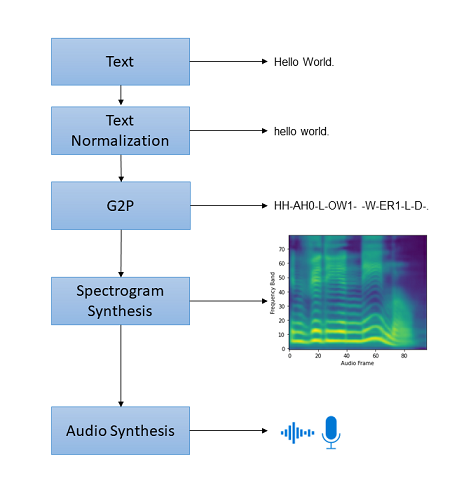

There are few trully end-to-end systems nowadays (ClariNet, FastSpeech2s and EATS).

See https://annemnvz-blog.vercel.app/blog/state-of-art-tts

**Introduction**

Text to speech (TTS), also known as speech synthesis, which aims to synthesize intelligible and natural speech from text. 

As the development of deep learning, neural network-based TTS has thrived and the quality of synthesized speech has been largely improved in recent years.



**Classic approaches to TTS**

- **Articulatory synthesis** produces speech by simulating the behavior of human articulator such as lips, tongue, glottis and moving vocal tract.
- **Formant synthesis** produces speech based on a set of rules that control a simplified source-filter model.
- **Concatenative synthesis** relies on the concatenation of pieces of speech that are stored in a database.

**Statistical Parametric Synthesis (SPSS)**

The basic idea of SPSS is that instead of direct generating waveform through concatenation, we can first generate the *acoustic parameters* that are necessary to produce speech and then *recover speech from the generated acoustic parameters* using some algorithms.

SPSS usually consists of three components: a text analysis module, a parameter prediction module (acoustic model), and a vocoder analysis/synthesis module (vocoder).

The text analysis module first processes the text, including text normalization, grapheme-to-phoneme conversion, word segmentation, etc, and then extracts the linguistic features, such as phonemes, duration and POS tags from different granularities.

The acoustic models (e.g., hidden Markov model (HMM) based) are trained with the paired linguistic features and parameters (acoustic features), where the acoustic features include fundamental frequency, spectrum or cepstrum, etc, and are extracted from the speech through vocoder analysis. 

The vocoders synthesize speech from the predicted acoustic features.

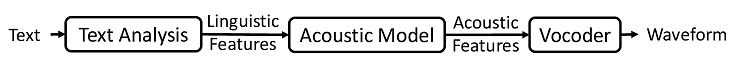

**Neural TTS**

First attempts to introduce deep NNs in TTS were limited to replacing HMM, but still predicting acoustic features from linguistic ones. Later, proposals were made to generate acoustic features directly from phoneme sequences.

For instance, WaveNet was proposed to directly generate the waveform from linguistic features. Models like DeepVoice 1/2 still include the three standard components of SPSS, but upgrade them with NNs.

Models like Tacotron 1/2, Deep Voice 3, and FastSpeech 1/2 were proposed to simplify text analysis modules and directly take character/phoneme sequences as input, and simplify acoustic features with mel-spectrograms.

In other words, although some end-to-end models do not explicitly use text analysis (e.g., Tacotron 2), acoustic models (e.g., WaveNet), or vocoders (e.g., Tacotron), and some systems only use a single end-to-end model (e.g., FastSpeech 2s), using these components are still popular in current TTS research and product.

Fully end-to-end TTS systems are developed to directly generate waveform from text, such as ClariNet, FastSpeech 2s and EATS.

The advantages of neural network based speech synthesis include high voice quality in terms of both intelligibility and naturalness, and less requirement on human preprocessing and feature development.

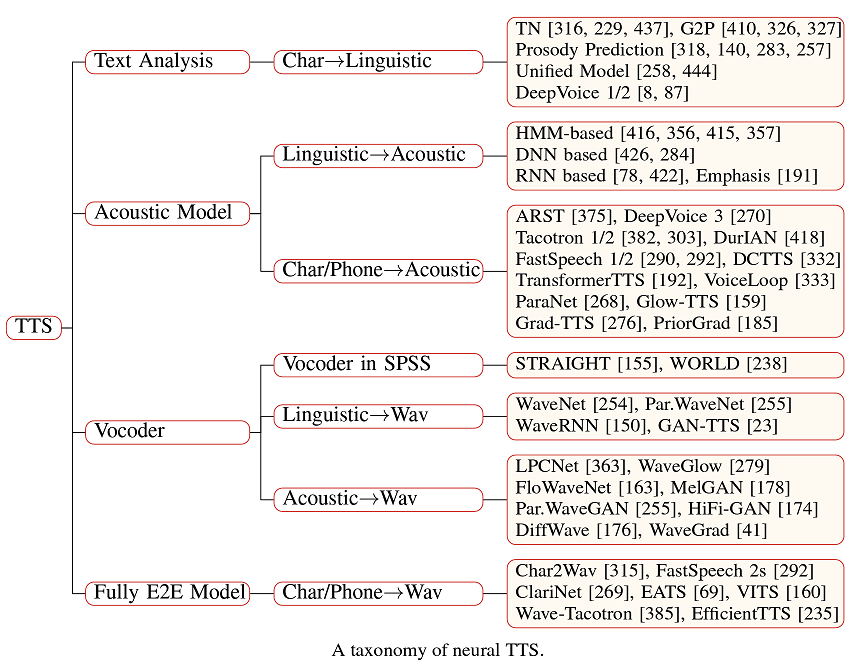

**Basic taxonomy**

TTS taxonomy is consistent with the data conversion flow from text to waveform:
1) Text analysis converts character into phoneme or linguistic features; 2) Acoustic models generate acoustic features, from either linguistic features or characters/phonemes;
3) Vocoders generate waveform from either linguistic features or acoustic features;
4) Fully end-to-end models directly convert characters/phonemes into waveform.

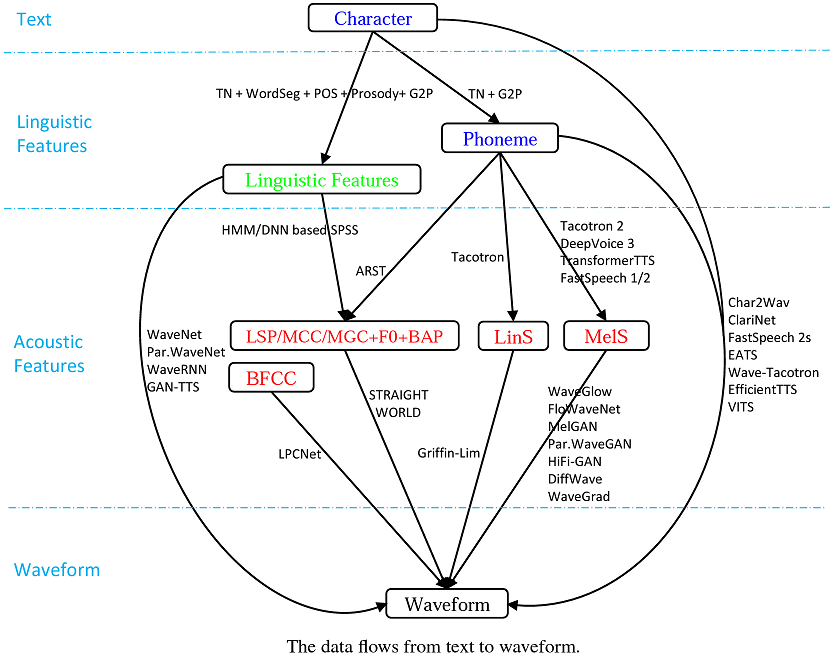

As can be seen from the figure, there can be different data flows from text to waveform:

- 1) character → linguistic features → acoustic features → waveform;
- 2) character → phoneme → acoustic features → waveform;
- 3) character → linguistic features → waveform;
- 4) character → phoneme → acoustic features → waveform;
- 5) character → phoneme → waveform, or character → waveform.

**Text analysis**

In statistic parametric synthesis, text analysis is used to extract a sequence of linguistic feature vectors [357], and contains several functionalities such as text normalization [316, 439], word segmentation [400], part-of-speech (POS) tagging [298], prosody prediction [51], and grapheme-to-phoneme conversion [410].

In end-to-end neural TTS, due to the large modeling capacity of neural based models, the character or phoneme sequences are directly taken as input for synthesis, and thus the text analysis module is largely simplified. In this scenario, text normalization is still needed to get standard word format from character input, and grapheme-to-phoneme conversion is further needed to get phonemes from standard word format.


**Text normalization**

Today text normalization is typically a very manual process involving lots of rules, heuristics, and regular expressions.

It is difficult to train a machine learning model to automate this step due to lack of labeled data. To get ground truth data one would need to manually annotate the entire dataset. The resulting model would then have strictly worse performance than the manual system producing the labels, making it better to use the original labeling system rather than the model.

**Dataset Preparation**

Most common public datasets for TTS modeling are already normalized before they are uploaded, allowing users to skip this step entirely.

When preparing new datasets for training, individuals will often rely on open source libraries for normalization, manually adding new logic into the system as they find situations in their datasets not covered by the pre-existing logic.

This logic is also hard to generalize across *languages*, making scaling TTS to multiple languages very challenging. 

Enterprises often find it necessary to hire linguists for every language they operate in, whose responsibility is to manually develop and improve the text processing and normalization for their specific languages and users.

**Grapheme to phoneme conversion**

After text normalization, we convert the written text into phonemes, the most basic unit of human speech.

For example (using [ARPABET](https://en.wikipedia.org/wiki/ARPABET)): *Hello World &rarr; HH, AH0, L, OW1, ,W, ER1, L, D*

Some languages are more *phonetic* than others, meaning their written characters/graphemes are always pronounced the same. For such languages G2P is unnecessary.

English, for examples, is less phonetic because:
*   characters change pronunciation depending on what word they are in.
*   some phonemes are represented by multiple characters (eg. "ch", "th", "ph")
*   some words are [Heteronyms](https://en.wikipedia.org/wiki/Heteronym_(linguistics%29#English), which are words with the same spelling but different pronunciation or meaning.
  * For example, "read" is pronounced differently depending on whether it is present tense or past tense.
  * Some heteronyms can be disambiguated based on what part of speech they are. But some, such as bass (fish or instrument), can only be disambiguated based on meaning/context.

For non-phonetic languages it is still possible to train a TTS model directly on the graphemes. But doing so will make the pronunciation of some words less accurate.

There are several different alphabets that can be used to represent the phonetic pronunciation of a sentence.

The most common phonetic alphabet is the **International Phonetic Alphabet (IPA)**, which provides a common set of phonemes for all languages.

For English, **ARPABET** is also very common. Largely due to the popularity of the [CMU Pronouncing Dictionary](http://www.speech.cs.cmu.edu/cgi-bin/cmudict).

Similar to Text Normalization, most G2P systems today are very manual.

The most common way that G2P is done today is to hardcode the grapheme to phoneme mapping for all common words in a language in a **pronouncing dictionary**.

A few examples of dictionary entries:
```
CAT  K AE1 T
HELLO  HH AH0 L OW1
NVIDIA  EH0 N V IY1 D IY0 AH0
```

This works decently for languages like English which have comprehensive dictionaries, but does not help for the large number of languages for which no such dictionary is available.

But even with a good dictionary, there are still a few problems.

*   Text with **out of vocabulary (oov)** words that are not in the dictionary
*   **Heteronyms**

**Dictionary Management**

The most straightforward way to deal with OOV words is to manually add them to your dictionary. Not very sustainable, but the only method guaranteed to be accurate.

For a TTS application, it is often a good idea to give individual users the option to create and manage their own dictionary so they can fix any mistakes on their own in real-time.

**Grapheme-Based TTS Training**

Training a model to generate audio from graphemes will (in theory) teach it to implicitly learn G2P rules based on its training data.

Training on only graphemes will typically result in poorer overall performance than training on phonemes.

**Machine Learning Model**

Given a pronunciation dictionary, one can train a machine learning model to try and predict phonemes from graphemes. Or the dictionary can be run on a full text corpus, and the model can be trained on the sentences in the corpus.

The resulting model will have lower prediction accuracy than the dictionary or G2P system it is trying to replicate, but it will be possible to run the model over OOV words the original dictionary could not process.

**Heteronyms**

There are not many good ways today to handle a word having multiple pronunciations.

The Grapheme-based training methods mentioned for OOV words can also be used here.

Another common approach relies on the fact that most (but not all) heteronyms can be disambiguated based on what part-of-speech they are.

*   Create an extra dictionary mapping heteronyms to phonemes based on what part-of-speech they are.
*   Use a [part-of-speech-tagger](https://en.wikipedia.org/wiki/Part-of-speech_tagging) to tag heteronyms.

**Acoustic models**

Different kinds of acoustic models have been adopted, including the early HMM and DNN based models in statistical parametric speech synthesis (SPSS) [416, 356, 426, 284, 78, 424], and then the sequence to sequence models based on encoder-attention-decoder framework (including LSTM, CNN and self-attention) [382, 303, 270, 192], and the latest feed-forward networks (CNN or self-attention) [290, 268] for parallel generation.

We can divide the acoustic models into two periods:
- 1) acoustic models in SPSS, which typically predict acoustic features such as MGC, BAP and F0 from linguistic features, and
- 2) acoustic models in neural based end-to-end TTS, which predict acoustic features such as mel-spectrograms from phonemes or characters

**Predicting** a spectrogram from text is a **sequence-to-sequence** problem because the input and output are different lengths. The length of the output is itself ambiguous, and something the model needs to predict.

Most successful approaches to this problem use an **encoder-decoder** system. The typical pattern looks like:

1.   The model has a **character embedding** for each character in its vocabulary. This is usually learned from scratch during training, but can also be pre-trained or augmented with generic language embeddings like *BERT*.
2.   The **encoder** analyzes the input sentence and applies various transformations to each character embedding in the output sequence. The *encoder outputs* are character embeddings that represent how each character should be *pronounced*, given the sentence. Encoders will also usually encode the approximate length, or **duration**, of each character.
3.   The **decoder** predicts the spectrogram using the sequence of character pronunciation embeddings provided by the encoder.

Most model architectures rely on **RNNs** or **Transformers** to do sentence-level processing (like how to pronounce or emphasize certain words based on the meaning of the sentence), and **CNNs** to process features based on their adjacent characters or audio frames (like how to start and end a word to make it flow naturally with the previous and next words).

Today there are two main categories of these encoder-decoder systems: **auto-regressive** models and **parallel** models. Within these categories, parallel models typically use **duration prediction**, while auto-regressive models can use duration prediction or **attention**.

Acoustic models in neural-based end-to-end TTS have several advantages compared to those in SPSS:

- 1) Conventional acoustic models require alignments between linguistic and acoustic features, while sequence to sequence based neural models implicitly learn the alignments through attention or predict the duration jointly
- 2) As the increasing modeling power of neural networks, the linguistic features are simplified into only character or phoneme sequence, and the acoustic features have changed from low-dimensional and condensed cepstrums (e.g., MGC) to high-dimensional mel-spectrograms or even more high-dimensional linearspectrograms.

**Autoregressive sequence generation**

The first good neural TTS models were auto-regressive models such as [Tacotron 2](https://google.github.io/tacotron/publications/tacotron2/index.html).

For these models, the encoder encodes the input sentence, and then the decoder predicts the spectrogram one audio frame at a time. This lets the model condition each spectrogram frame on the frames before it, producing high quality audio.

<br>
<div>
<img src="https://raw.githubusercontent.com/NVIDIA/NeMo/main/tutorials/tts/images/tacotron2_diagram.png" width="600", height="500"/>
</div>

The model is fairly complex. At a high level, it contains:

1.   A CNN-RNN *encoder* which uses a bidirectional LSTM to analyze the entire sentence forward and backwards to figure out the pronunciation of every character.
2.   A unidirectional LSTM *decoder* which predicts the spectrogram one frame at a time.
3.   An **attention** mechanism that the decoder uses to determine which character(s) to look at when generating specific audio frames.
4.   A *stop token* layer which predicts a single number [0, 1] to determine the probability that the decoder has reached the end of the sentence.
5.   A *pre-net* that feeds the previous predicted frame into the decoder before predicting the next frame. This is used primarily for **teacher forcing** so that the model can learn effectively.
6.   A *post-net* which post-processes the entire spectrogram produced by the decoder to fix inconsistencies and smooth it out.

The attention and teacher forcing mechanisms are the main characteristics that define the auto-regressive model and differentiate it from non-auto-regressive systems. These will be discussed in more detail below.

The post-net is an optional optimization.

The specifics of the encoder and decoder are not too important, and can be replaced with any equivalent combination of RNN, CNN, and/or Transformer blocks. 



An auto-regressive model predicts the spectrogram based primarily on the encoder output features. For the output to make sense, each audio frame produced needs to be based on a subset of the characters in the input. Which character(s) the decoder is using when it predicts an audio frame is called its **attention**.

Using the NeMo framework, let's see what our Tacotron 2 attention looks like.

In [ ]:
import torch
from nemo.collections.tts.models import Tacotron2Model

Tacotron2Model.list_available_models()

In [ ]:
tacotron2_model = Tacotron2Model.from_pretrained("tts_en_tacotron2").eval().to(device)
tacotron2_model.calculate_loss = False

g2p = EnglishG2p(ignore_ambiguous_words=False)

In [ ]:
text = "This is an attention map."

tokens = tacotron2_model.parse(text, normalize=True)
token_len = torch.tensor([tokens.shape[1]], dtype=torch.long, device=spectrogram_model.device)

_, _, _, alignments, _ = tacotron2_model.forward(tokens=tokens, token_len=token_len)
alignment = alignments[0].cpu().detach().numpy()

In [ ]:
# Pretrained Tacotron 2 uses grapheme input with beginning-of-speech and end-of-speech tokens
characters = ["<BOS>"] + [char for char in text] + ["<EOS>"]

fig, ax = plt.subplots(figsize=(10, 8))
plt.xlabel("Audio Frame")
plt.ylabel("Character")
_ = ax.imshow(alignment.transpose(), origin='upper', aspect='auto')
_ = ax.set_yticks(range(len(characters)))
_ = ax.set_yticklabels(characters)

In order to get good quality output, we need our model's attention to follow these constraints:

*   The decoder should pay attention to one character at a time (sometimes it also places weight on the one character immediately before and/or after it).
*   The attention should be **monotonically increasing**, meaning it never go backwards in the text sequence. So the attention should only ever stay on the current character, or move forward to the next character.
*   The model should start on the first character in the sequence and end on the last character.

These constraints result in the decoder effectively "reading" the text character by character or word by word, similar to how humans read aloud.

A model may need to be trained for a while before its attention learns to follow these constraints. Before that, the attention may look non-sensical, and the model output will sound unintelligible.

Once the models learns the above constraints and starts producing well-behaved attention maps, it is said that the model has **aligned**.

**Attention Mechanisms**

A large number of different systems have been developed over time to model TTS attention. Historically a lot of these mechanisms would use various inputs (decoder state, previous prediction, previous attention weights, etc) during each decoder step to predict a softmax across all characters in the sentence.

This works decently, but is not very good at enforcing the constraints listed above. A better [alternative](https://arxiv.org/abs/2108.10447) is to model the attention similar to a *Hidden Markov Model*; a state machine in which each character in the text is a state and the only valid state transitions are to stay on the current character or move forward 1 character.

**Training features and teacher forcing**

Another very important aspect of TTS modeling is **teacher forcing**, which means that during training we provide various pieces of ground truth information to the model and at inference provide equivalent predicted values.

Training a model to directly predict a spectrogram from text by itself does not work, for a few reasons:

*   Spectrogram Synthesis is a difficult enough problem that most models will not converge to anything meaningful if its only input is text.
*   The prediction target is extremely *ambiguous*. There are several correct ways to read any sentence. For training to be smooth, the input features need to be enough to figure out the speaking pattern for most training utterances.

The most standard form of teacher forcing in auto-regressive systems is for each decoder step to receive the ground truth prediction from the previous step. In other words, each decoder step predicts an audio frame. During training, the ground truth audio frame is passed to the next decoder step. During inference, the predicted audio frame is passed to the next decoder step. In Tacotron 2, the pre-net applies a large amount of dropout to this input to avoid overfitting.

Some other common forms of ground truth information that have been found to be useful are:

*   **Pitch**: By providing the pitch, aka. the [fundamental frequency](https://en.wikipedia.org/wiki/Fundamental_frequency) **(F0)**, for each character, a model is able to better learn and mimic a variety of natural speaking patterns.
*   **Speaking Rate**: By providing the length of the ground truth spectrogram as an input feature, the model is able to easily disambiguate how long the final audio should be. At inference time a user can then manually change the input value to make the model speak as slow or as fast as they want.
*   **Style Embeddings**: By training an *auto-encoder* on the TTS training data, it is possible to represent very complex speaking styles with utterance-level embeddings. Taking a style embedding from one utterance to make a speaker say a different sentence with the same speaking characteristics is referred to as **style transfer**.


Let's take an utterance and compare the output of Tacotron2 when teacher forcing is used versus when it is not. The teacher forcing ensures that the predicted spectrogram is the same length as the ground truth spectrogram, so this type of inference is often referred to as being **ground truth aligned (GTA)**.

In [ ]:
import wget

audio_path = "LJ023-0089.wav"
audio_url = "https://multilangaudiosamples.s3.us-east-2.amazonaws.com/LJ023-0089.wav"

if not os.path.exists(audio_path):
  wget.download(audio_url, audio_path)

In [ ]:
import librosa

# Process text input
text = "That is not only my accusation."

tokens = tacotron2_model.parse(text, normalize=True)
token_len = torch.tensor([tokens.shape[1]], dtype=torch.long, device=tacotron2_model.device)

# Run regular inference
_, predicted_spectrogram, _, _, _ = tacotron2_model.forward(tokens=tokens, token_len=token_len)
predicted_audio = vocoder.convert_spectrogram_to_audio(spec=predicted_spectrogram)
predicted_audio = predicted_audio.cpu().detach().numpy()[0]

# Process the ground truth audio
sample_rate = 22050
audio, _ = librosa.load(audio_path, sr=sample_rate)

audio_tensor = torch.from_numpy(audio).unsqueeze(0).to(tacotron2_model.device)
audio_len = torch.tensor(audio_tensor.shape[1], dtype=torch.long, device=tacotron2_model.device).unsqueeze(0)

# Run GTA inference. This is a bit awkward to set up as Tacotron2 only expects to do this at training time.
tacotron2_model.calculate_loss = True
tacotron2_model.training = True
tacotron2_model.decoder.training = True
_, gta_spectrogram, _, _, _, _ = tacotron2_model.forward(
    tokens=tokens,
    token_len=token_len,
    audio=audio_tensor,
    audio_len=audio_len
)
tacotron2_model.calculate_loss = False
tacotron2_model.training = False
tacotron2_model.decoder.training = False

gta_audio = vocoder.convert_spectrogram_to_audio(spec=gta_spectrogram)
gta_audio = gta_audio.cpu().detach().numpy()[0]

In [ ]:
print(f'"{text}"\n')

print("Original Audio")
ipd.display(ipd.Audio(audio, rate=sample_rate))

print("GTA Audio")
ipd.display(ipd.Audio(gta_audio, rate=sample_rate))

print("Predicted Audio")
ipd.display(ipd.Audio(predicted_audio, rate=sample_rate))

We see that with teacher forcing, the model output sounds almost exactly like the original audio. This is how the model learns how to generate audio that sounds realistic and high-quality.

However, at inference time we see that the pitch of the speaker is very different. Without teacher forcing, and without receiving the pitch as an input feature, the model has no way of knowing what pitch to use. So most likely, all predicted utterances will end up using the average pitch observed at training time.

**Duration prediction**

A large weakness of the original Tacotron 2 model is its attention mechanism, which does not enforce the required monotonicity constraint (ie. the decoder must pay attention to each character once in sequential increasing order). As a result, the attention is not robust. It often skips words, repeats words, or encounters catastrophic failures where the output becomes unintelligible.

There are some attention mechanisms such as [forward attention](https://arxiv.org/abs/1807.06736) which try to address this.

The most standard approach today is to do **explicit duration prediction**. This means that the model encoder predicts the duration (ie. number of spectrogram frames) of each character directly, instead of relying on the attention to determine it implicitly.

Replacing the attention mechanism in Tacotron 2 with duration prediction, eg. [Non-Attentive Tacotron](https://arxiv.org/abs/2010.04301), has historically been a common and necessary optimization to make it robust enough for use in enterprise applications. Though it gained visibility in academic literature primarily due to its use in modern transformer based model architectures such as [FastSpeech](https://arxiv.org/abs/1905.09263) and [FastPitch](https://fastpitch.github.io/).

The biggest drawback of this approach is that you need to get the ground truth character duration information. Some methods for doing this are:

1.   The preferred method in NeMo is to Jointly train an [alignment model](https://arxiv.org/abs/2108.10447) that measures the similarity between characters and spectrogram frames.
2.   Run forced alignment, such as with the [Montreal Forced Aligner](https://montreal-forced-aligner.readthedocs.io/en/latest/).
3.   Infer the duration information from the attention map of a teacher model, such as Tacotron 2.

**Non-autoregressive sequence generation**

There are some significant weaknesses to auto-regressive systems. Most notably:

*  Spectrograms are long (100s-1000s of frames), so generating them one frame at a time makes inference slow.
*  They are typically implemented using RNN based architectures, which are slow to train.
*  The user has little control over how the sentence is spoken.

Using duration prediction enables us to remove the auto-regressive inference and predict every spectrogram frame in parallel. This makes the inference speed up to 100x faster, making it highly preferable for deploying and serving to users.

[FastPitch](https://fastpitch.github.io/) is a parallel transformer-based model with pitch and duration control and prediction.

<div>
<img src="https://raw.githubusercontent.com/NVIDIA/NeMo/main/tutorials/tts/images/fastpitch_diagram.png" width="600", height="500"/>
</div>

At a high level it contains:

1.   An encoder consisting of a **feed-forward transformer block (FFTr)**, which transforms the input character embeddings into character pronunciation embeddings.
2.   A temporal CNN which takes the encoder output and predicts the duration and pitch of each character. At training time, the ground truth pitch and duration information are fed to the model (similar to teacher forcing).
3.   Each encoder output is repeated a number of times equal to the predicted duration. The repeated encoder output is the same length as the final spectrogram. For example, for characters 'abc' and predicted durations (2, 3, 1) we get the encoder output repeated 'aabbbc'. 
4.   A decoder consisting of a FFTr that transforms this encoder output into the predicted spectrogram.

Some advantages to this approach are:

*   The duration prediction makes the output consistent and robust.
*   The model inference is fast, able to synthesize up to 1000 seconds of audio every second on an A100 GPU.
*   You can customize the prosody by manually selecting the pitch and duration of each character or word.

In [ ]:
from nemo.collections.tts.models import FastPitchModel

fastpitch_model = FastPitchModel.from_pretrained("tts_en_fastpitch").eval().to(device)

In [ ]:
text = "This audio was generated with the fastpitch text-to-speech model."

# Normalize the text and convert it into individual phonemes/tokens.
tokens = fastpitch_model.parse(text, normalize=True)

# Generate spectrogram from text
spectrogram = fastpitch_model.generate_spectrogram(tokens=tokens)

# Invert the spectrogram into audio samples
audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)

# Convert output from pytorch tensor to numpy array
spectrogram = spectrogram.cpu().detach().numpy()[0]
audio = audio.cpu().detach().numpy()[0]

In [ ]:
print(f'"{text}"\n')

ipd.Audio(audio, rate=22050)

One weakness of parallel models is that without auto-regressive teacher forcing, the model is unable to reliably predict/reconstruct the original utterance. Primarily due to the inputs not fully capturing the unpredictable variability/ambiguity in the possible outputs. The result is that the model learns an average over possible outputs, creating spectrograms that look unrealistically "smooth", degrading the audio quality (https://arxiv.org/abs/2202.13066).

This problem can be partially alleviated by fine-tuning the vocoder model (described in the next section) directly on the predicted spectrograms.

To visualize this, let's compare a spectrogram to the corresponding one predicted by FastPitch.

In [ ]:
# Compute real spectrogram
audio_path = "LJ023-0089.wav"
sample_rate = 22050

audio, _ = librosa.load(audio_path, sr=sample_rate)
audio_tensor = torch.from_numpy(audio).unsqueeze(0).to(fastpitch_model.device)
audio_len = torch.tensor(audio_tensor.shape[1], dtype=torch.long, device=fastpitch_model.device).unsqueeze(0)

real_spectrogram, _ = fastpitch_model.preprocessor(input_signal=audio_tensor, length=audio_len)
real_spectrogram = real_spectrogram.cpu().detach().numpy()[0]

# Run FastPitch inference
text = "That is not only my accusation."

tokens = fastpitch_model.parse(text, normalize=True)
predicted_spectrogram = fastpitch_model.generate_spectrogram(tokens=tokens)
predicted_spectrogram = predicted_spectrogram.cpu().detach().numpy()[0]

In [ ]:
# Compare the spectrograms
imshow(real_spectrogram, origin="lower")
plt.title("Spectrogram")
plt.show()

imshow(predicted_spectrogram, origin="lower")
plt.title("Predicted Spectrogram")
plt.show()

As we can see, the predicted spectrogram looks very smooth and well-behaved compared to the ground truth which has a more variation and detail.

There is ongoing research into improving the audio quality and expressiveness of models like FastPitch, with a few methods that have shown promising results being:

1.   Train a [variational auto-encoder](https://en.wikipedia.org/wiki/Variational_autoencoder) (VAE) that can compress all utterance-level variation/prosody into an embedding and provide it as a feature it to the decoder (https://arxiv.org/abs/1812.04342).
2.   Use [normalizing flows](https://arxiv.org/abs/1908.09257) (sometimes called *glow* models) to directly learn the variability in the training data (eg. [RAD-TTS](https://nv-adlr.github.io/RADTTS)).
3.   Use [generative adversarial networks](https://en.wikipedia.org/wiki/Generative_adversarial_network) (GAN) based training to make the predicted spectrograms harder to tell apart from real spectrograms.
4.   Avoid the spectrogram entirely by training an end-to-end model that can go directly from text to audio (eg. [VITS](https://arxiv.org/pdf/2106.06103.pdf)).

**Vocoders**

Reconstructing audio from a spectrogram can theoretically be done using the [inverse FFT](https://pytorch.org/docs/stable/generated/torch.fft.ifft.html?highlight=fft) (iFFT). However there are a few complications in doing this with our model.

1.   The mel spectrogram does not contain the phase information output by the original FFT.
2.   The predicted spectrogram is imperfect. It is likely smoother than the ground truth and may contain noise or other unnatural characteristics/artifacts.

We could approximate the phase information using the *Griffin-Lim* algorithm. However its just an approximation, and does not help with issue (2).

So instead we train a separate model called a **vocoder** to generate the audio. This model can learn to do the audio reconstruction more accurately. If necessary we can train it directly on the ground-truth aligned spectrograms produced by our model to teach it to *denoise* the output automatically, often called **GTA fine-tuning**.

Roughly speaking, the development of vocoders can be categorized into two stages: the vocoders used in statistical parametric speech synthesis (SPSS) [155,238,3], and the neural network-based vocoders [254,315,150,279,163].

Some popular vocoders in SPSS include STRAIGHT [155] and WORLD[238]. During vocoder analysis, the vocoder analyzes the speech and gets acoustic features  such as mel-cepstral coefficients [82], band aperiodicity [156,157]and F0. During vocoder synthesis, the vocoder  generates speech waveform from these acoustic features.

Early neural vocoders such as WaveNet[254,255], Char2Wav[315], WaveRNN[150]directly take linguistic features as input and generate waveform. Later models take mel-spectrograms as input and generate waveform.

We divide the neural vocoders into different categories:
- 1) Autoregressive vocoders
- 2) Flow-based vocoders
- 3) GAN-based vocoders
- 4) VAE-based vocoders
- 5) Diffusion-based vocoders.


Spectrogram inversion is a *sequence-to-sequence* problem.

The input sequence is the mel spectrogram with 80 mel bands for each audio frame, and the output is a sequence of audio samples. For example, the input sequence may have 100 audio frames making it dimension [100, 80] and have a corresponding audio output sequence of dimension [25,600, 1]

The audio samples being discrete 16-bit integers can be predicted using a *softmax* layer size 2<sup>16</sup>. Or we can divide them by 2<sup>16</sup> to scale them to the range [-1, 1] and then predict them as a continuous value using an appropriate activation like *tanh*.

Most sequence-to-sequence problems rely on attention or other upsampling methods, but in this case it is unnecessary because the ratio of input to output elements is fixed. So given any input, we already know the final output length and which output samples correspond to which input frames.

The ratio is dependent on length of each audio frame.

In NeMo, for 22.05 kHz audio, we use a audio window **stride** of 256 meaning there are exactly 256 audio samples for each audio spectrogram frame. For 44.1 kHz we double the stride to 512.

This means each audio frame represents approximately (256 / 22.05) = 11.61 ms of audio.

The first step for most approaches is to **upsample** our input sequence to match the final output length. This can be done by *duplicating* each audio frame a number of times equal to your audio stride/ratio.

Or if your stride is a power of 2 (like the ones we selected) then you can upsample the sequence more effectively using *transposed convolutions* (aka. *deconvolutional layers*).

Once the input and output sequences are the same length, you can use any number of models to predict the output.

**Examples**

The first mainstream vocoder was [WaveNet](https://www.deepmind.com/blog/wavenet-a-generative-model-for-raw-audio), a very large auto-regressive *dilated causal CNN*. For each predicted audio sample, the CNN predicts a softmax probability across all possible 2<sup>16</sup> sample values.

Here auto-regressive means every audio sample is predicted by looking at the entire history of previously predicted audio samples. Dilated means it samples a few past audio samples spread over a wide range, instead of processing every past sample or only recent samples. Causal means the CNN only uses information from past predictions; it does not condition on audio samples after it.

<br>
<center>
<img src="https://raw.githubusercontent.com/NVIDIA/NeMo/main/tutorials/tts/images/wavenet_diagram.png" width="600", height="300"/>
<figcaption>Diagram of a dilated causal CNN</figcaption>
<br>
</center>

This system is very accurate, but also very slow. Largely because of the auto-regressive system predicting 1 sample at a time for an output that is 10,000s to 100,000s of samples long. Its **real-time factor (RTF)** is on the order of 100, meaning it takes up to 100 seconds to reconstruct 1 second of audio. This makes it impractical to use in most applications.

The most common vocoder used in NeMo is [HiFi-GAN](https://arxiv.org/abs/2010.05646). The architecture is similar to WaveNet. The main difference is that it is smaller, and not auto-regressive. This allows it to reach a speed of around 0.01 RTF; 10,000x faster than WaveNet.

The main way that HiFi-GAN achieves this speed with minimal sacrifice to perceived audio quality is through *adversarial training*, treating the vocoder like a **generative adversarial network (GAN)**.

To do this, we jointly train the vocoder with a set of *discriminators* that try to predict whether the synthesized/reconstructed audio is real or not. The goal being to trick the discriminators so they cannot systematically tell the difference between the synthesized audio and the original audio. Doing this allows us to get realistic audio with a significantly smaller model.

Notably it uses multiple **scale discriminators**, which are temporal CNNs that try to classify the audio as real or fake after average pooling sets of adjacent audio samples, and **period discriminators** which try to classify using audio sampled over different periods. 

In addition to penalizing the model if the discriminator can classify the synthesized audio as fake, it also uses **feature matching loss** to penalize the model if the distribution of intermediate layer outputs in the discriminator networks differ between the real and synthesized audio.

<center>
<img src="https://raw.githubusercontent.com/NVIDIA/NeMo/main/tutorials/tts/images/hifi_gan_discriminator_diagram.png" width="600", height="300"/>
<figcaption>HiFi-Gan scale and period discriminators</figcaption>
</center>

Many people tend to avoid RNNs because of how slowly they train compared to CNNs and Transformers.

However, they are one of the most used architectures in real-world applications and industry due to their small compute requirements and memory footprint at inference time. This makes them ideal for low-latency and low-power situations like *on-device* TTS.

[WaveRNN](https://arxiv.org/abs/1802.08435) is a popular vocoder for those who want to do spectrogram inversion on-device.

The model itself manages to minimize compute requirements in several different ways that are too complex to summarize adequately here. But a few highlights would be:

1.   Instead of using a 2<sup>16</sup> sized softmax, it uses two 2<sup>8</sup> sized softmaxes to predict the first and last 8-bits of the 16-bit audio sample separately.
2.   Uses a *subscaling* system to have the RNN predict 16 audio samples at a time instead of 1 sample at a time.
3.   Uses *sparse RNN training* during which the smallest model weights in the RNN are periodically set to zero. Inference is then done efficiently using sparse vectors.

**Quality assessment**

There are no well-established objective metrics for evaluating how good a TTS model is. Rather, quality is usually based on human opinion or perception, commonly measured through surveys.

The most common type of survey for evaluating TTS quality is [mean opinion score](https://en.wikipedia.org/wiki/Mean_opinion_score) (**MOS**), in which listeners rate the quality of TTS samples on a 1 to 5 scale.

Another common alternative is [MUSHRA](https://en.wikipedia.org/wiki/MUSHRA) in which users are provided a reference (the ground truth audio) and asked to rate several TTS samples relative to the reference.

There are some metrics which are occasionally used to try and measure audio quality such as [MCD-DTW](https://github.com/MattShannon/mcd), [PESQ](https://en.wikipedia.org/wiki/Perceptual_Evaluation_of_Speech_Quality), and [STOI](https://torchmetrics.readthedocs.io/en/stable/audio/short_time_objective_intelligibility.html). But these have very limited accuracy and usefulness.

The lack of objective numerical metrics that can be trained on is a large reason as to why many state of the art models rely on GAN based training to get good quality.

**Fully end-to-end TTS**



Fully end-to-end TTS models can generate speech waveform from character or phoneme sequence directly. It offers following advantages:
- 1) It requires less human annotation and feature development (e.g., alignment information between text and speech)
- 2) The joint and end-to-end optimization can avoid error propagation in cascaded models
3) It can also reduce the training, development and deployment cost.

There are big challenges to train TTS models in an end-to-end way, mainly due to the different modalities between text and speech waveform, as well as the huge length mismatch between character/phoneme sequence and waveform sequence.

For example, for a speech with a length of 5 seconds and about 20 words, the length of the phoneme sequence is just about 100, while the length of the waveform sequence is 80k (if the sample rate is 16kHz).

It is hard to put the waveform points of the whole utterance into model training, due to the limit of memory. It is hard to capture the context representations if only using a short audio clip for the end-to-end training.

Due to the difficulty of fully end-to-end training, the development of neural TTS follows a progressive process towards fully end-to-end models. 

- 1) only the text normalization and grapheme-to-phoneme conversion are retained to convert characters into phonemes, or the whole text analysis module is removed by directly taking characters as input.

- 2) simplifying acoustic features, where the complicated acoustic features such as MGC, BAP and F0 used in SPSS are simplified into mel-spectrograms.

- 3) replacing two or three modules with a single end-to-end model. For example, the acoustic models and vocoders can be replaced with a single vocoder model.



### Advanced topics

**Advanced taxonomy**

Besides the main taxonomy from the perspective of key components and data flow, we can also categorize TTS works from several different taxonomies, as shown in the following figure:

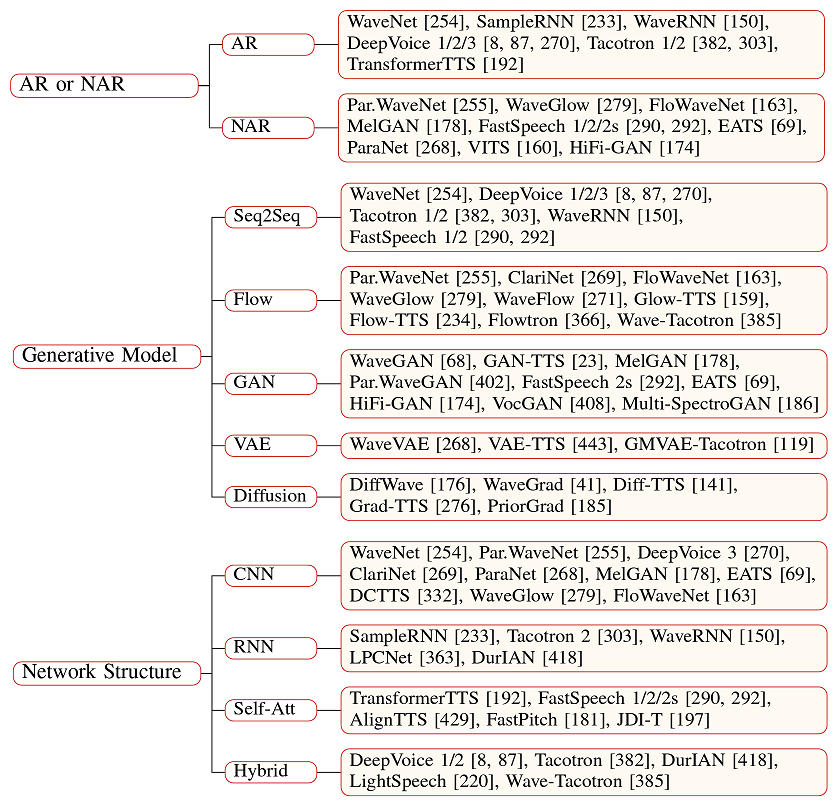

**Generative models**

**Different network structures**

**Advanced topics**

*Speeding up autoregressive generation*

*Low-resource TTS*

*Robustness of speech synthesis*

*Prosody and style-transfer for expressive speech*

*Voice conversion*
- https://ieeexplore.ieee.org/document/7586373
- https://github.com/ruslanmv/Clone-voice-with-Pytorch

### Hands-on

**OSS packages and corpora for training TTS**

- https://github.com/espnet/espnet
- https://github.com/mozilla/TTS - Mozilla
- https://github.com/TensorSpeech/TensorflowTTS
- https://github.com/coqui-ai/TTS - coqui
- https://github.com/PaddlePaddle/Parakeet
- https://github.com/NVIDIA/NeMo
- https://github.com/ibab/tensorflow-wavenet
- https://github.com/r9y9/wavenet_vocoder
- https://github.com/basveeling/wavenet
- https://github.com/soroushmehr/sampleRNN_ICLR2017
- https://github.com/sotelo/parrot
- https://github.com/keithito/tacotron
- https://github.com/Kyubyong/tacotron
- https://github.com/Rayhane-mamah/Tacotron-2
- https://github.com/NVIDIA/tacotron2
- https://github.com/r9y9/deepvoice3_pytorch
- https://github.com/as-ideas/TransformerTTS
- https://github.com/xcmyz/FastSpeech - Microsoft
- https://github.com/ming024/FastSpeech2 - Microsoft End-to-End
- https://github.com/descriptinc/melgan-neurips
- https://github.com/seungwonpark/melgan
- https://github.com/fatchord/WaveRNN
- https://github.com/mozilla/LPCNet
- https://github.com/NVIDIA/WaveGlow
- https://github.com/ksw0306/FloWaveNet
- https://github.com/chrisdonahue/wavegan
- https://github.com/r9y9/gantts
- https://github.com/kan-bayashi/ParallelWaveGAN
- https://github.com/jik876/hifi-gan, https://paperswithcode.com/method/hifi-gan
- https://github.com/jaywalnut310/glow-tts
- https://github.com/NVIDIA/flowtron
- https://github.com/lmnt-com/diffwave
- https://github.com/ivanvovk/WaveGrad
- https://github.com/jaywalnut310/vits
- https://github.com/seungwonpark/awesome-tts-samples
- https://github.com/faroit/awesome-python-scientific-audio

**Tutorials**

- https://tts-tutorial.github.io/iscslp2021/
- https://tts-tutorial.github.io/ijcai2021/
- https://www.superlectures.com/iscslp2014/tutorial-4-deep-learning-for-speech-generation-and-synthesis
- http://staff.ustc.edu.cn/~zhling/download/ISCSLP16_tutorial_DLSPSS.pdf 
- https://www.slideshare.net/jyamagis/tutorial-on-endtoend-texttospeech-synthesis-part-1-neural-waveform-modeling
- https://www.youtube.com/watch?v=vEAq_sBf1CA
- https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/45882.pdf
- http://www.sp.nitech.ac.jp/~tokuda/INTERSPEECH2019.pdf
- https://www.microsoft.com/en-us/research/uploads/prod/2021/02/ISCSLP2021-TTS-Tutorial.pdf
- https://www.youtube.com/watch?v=MA8PCvmr8B0
- https://tts-tutorial.github.io/ijcai2021/

**TTS training tutorials**

- https://rioharper.medium.com/cloning-your-voice-cb321908b060
- https://www.youtube.com/watch?v=b1erA6vGnNc start at 42:18

- https://speech-ai-workshop-nvidia.wandb.events/agenda/session/1043651
- https://github.com/shivammehta25/OverFlow

https://ai.facebook.com/blog/a-highly-efficient-real-time-text-to-speech-system-deployed-on-cpus/

https://pytorch.org/audio/stable/tutorials/tacotron2_pipeline_tutorial.html#phoneme-based-encoding

**Tortoise**

- https://nonint.com/2022/04/25/tortoise-architectural-design-doc/
- https://github.com/neonbjb/tortoise-tts
- https://nonint.com/static/tortoise_v2_examples.html
- https://m.youtube.com/watch?v=J3-jfS29RF4#menu

**Amazon Research**

https://www.amazon.science/blog/alexas-text-to-speech-research-at-interspeech-2022

**Hugging Face**

- https://huggingface.co/models?pipeline_tag=text-to-speech&sort=downloads

# Speaker recognition

- https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/speaker_tasks/Speaker_Identification_Verification.ipynb

Speaker Recognition (SR) is a broad research area that solves two major tasks: speaker identification (who is speaking?) and
speaker verification (is the speaker who they claim to be?).

In this example, we focus on text-independent speaker recognition when the identity of the speaker is based on how the speech is spoken,
not necessarily in what is being said.

Typically such SR systems operate on unconstrained speech utterances,
which are converted into fixed-length vectors, called speaker embeddings. 

Speaker embeddings are also used in
automatic speech recognition (ASR) and speech synthesis.

Training for a speaker verification model is almost the same as the speaker recognition model with a change in the loss function. Angular Loss is used to train a speaker verification model as the model is trained for embeddings cluster to be far from each other for different speakers by maximizing the angle between these clusters.

See examples of angualar loss here https://github.com/cvqluu/Angular-Penalty-Softmax-Losses-Pytorch



## Sound classification

**Data sets**

- https://github.com/hche11/VGGSound
- https://huggingface.co/datasets?task_categories=task_categories:audio-classification&sort=downloads

### Emotion recognition

**Data sets**

- https://github.com/SuperKogito/SER-datasets
- https://github.com/david-yoon/multimodal-speech-emotion
- https://tspace.library.utoronto.ca/handle/1807/24487
- https://zenodo.org/record/1188976
- https://www.kaggle.com/datasets?search=speech+emotion
- http://emodb.bilderbar.info/start.html
- http://www.compare.openaudio.eu/data/

**Libraries**

- https://github.com/audeering
- https://github.com/audeering/opensmile-python
- https://audeering.github.io/opensmile-python/usage.html
- https://audeering.github.io/opensmile-python/api-smile.html
- https://github.com/audeering/audtorch
- https://audeering.github.io/audtorch/api-datasets.html
- http://www.compare.openaudio.eu/tools/

**Tutorials**

- https://www.thepythoncode.com/article/building-a-speech-emotion-recognizer-using-sklearn
- https://github.com/x4nth055/emotion-recognition-using-speech
- https://towardsdatascience.com/speech-emotion-recognition-with-convolution-neural-network-1e6bb7130ce3

## Sound playlist

- https://github.com/teticio/Deej-AI

# Data sets

- https://github.com/coqui-ai/open-speech-corpora
- https://github.com/topics/speech-emotion-recognition